# Taiwan Stock High-Frequency Trading Portfolio Strategy: Machine Learning-Based Minute-Level Prediction and Backtesting System
## Âè∞ËÇ°È´òÈ†ª‰∫§ÊòìÊäïË≥áÁµÑÂêàÁ≠ñÁï•ÔºöÂü∫ÊñºÊ©üÂô®Â≠∏ÁøíÁöÑÂàÜÈêòÁ¥öÈ†êÊ∏¨ËàáÂõûÊ∏¨Á≥ªÁµ±

## Overview

 This project focuses on minute-level trading data of 25 major weighted stocks in the Taiwan stock market. It performs feature engineering by combining multi-factor signals and technical indicators, and uses a LightGBM model to predict short-term returns. The predicted results are validated through dual-mode backtesting (`from_signals` and `from_order_func`) using the `vectorbt` framework, effectively evaluating the performance of both signal-based and position-controlled strategies.

 Êú¨Â∞àÊ°àÂ∞àÊ≥®ÊñºÂè∞ËÇ°25Ê™îÊ¨äÂÄºËÇ°ÁöÑÂàÜÈêòÁ¥öË≥áÊñôÔºåÁµêÂêàÂ§öÂõ†Â≠êÁâπÂæµËàáÊäÄË°ìÊåáÊ®ôÈÄ≤Ë°åÁâπÂæµÂ∑•Á®ãÔºåÈÄèÈÅéLightGBMÊ®°ÂûãÈ†êÊ∏¨Áü≠ÊúüÂ†±ÈÖ¨ÔºåÈ†êÊ∏¨ÁµêÊûúÂ∞áÈÄèÈÅé`vectorbt`Ê°ÜÊû∂ÈÄ≤Ë°åÈõôÊ®°ÂºèÂõûÊ∏¨ÂàÜÊûêÔºà`from_signals`Ëàá`from_order_func`ÔºâÔºå‰ª•È©óË≠âÊ®°ÂûãÈ†êÊ∏¨Ë®äËôüÂèäÂÄâ‰ΩçÊéßÂà∂Á≠ñÁï•ÁöÑÂØ¶ÈöõÊïàËÉΩ„ÄÇ

## Workflow

- **Data Collection & Preprocessing**: 

    - Collect minute-level OHLCV data from Taiwan's top 25 market cap stocks, performing data cleaning and preprocessing.


- **Feature Engineering**: 
    
    - Extract 101 alphas and common price-volume factors for high-frequency trading.
    - Refine and engineer raw features, including transformations and return calculations.

- **Data Splitting**:
    - Split data by rolling time windows into 9 training-validation sets and 1 testing set.

- **Model Training**:
    - Use a custom Information Coefficient (IC) as the evaluation metric for model performance.
    - Train and optimize the model using `LightGBM` in combination with `Optuna` library.

- **Model Testing**:
    - Apply the best parameters from the final model to predict on the test set.
    - Visualize the prediction results on the test set to observe performance.

- **Backtesting**: 
    - Built trading strategies using both the `from_signals` and `from_order_func` methods from the `vectorbt.Portfolio` module.
    - Select and prioritize strategy indicators, and implement customized trading logic including entry/exit order, position sizing, capital constraints, and more.

## Import Package, Settings
 Import necessary Python packages including data processing, machine learning, and backtesting tools, with initialization configurations.

In [229]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
import os
import plotly
import plotly.graph_objects as go
import plotly.io as pio
from IPython.display import Image, display, SVG
import os
    
import shap

import vectorbt as vbt
import datetime as dt
import talib as ta

import string as str
import random

import lightgbm as lgb
import optuna
from functools import partial
from tqdm.auto import tqdm
import time
import joblib
import warnings
warnings.filterwarnings('ignore')  # ÈóúÊéâÊâÄÊúâË≠¶Âëä

# print(os.getcwd())
# print(os.path.abspath("example.txt"))

import sys
sys.path.append('c:\\python_vs\\WorldQuant_alpha101_code')
from Alpha_code_1 import *

## ËôïÁêÜ‰∏≠Êñá‰∫ÇÁ¢º
def plt_chinese():
    plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] # ‰øÆÊîπ‰∏≠ÊñáÂ≠óÈ´î
    plt.rcParams['axes.unicode_minus'] = False # È°ØÁ§∫Ë≤†Ëôü

plt_chinese()

# Fubon API
# from fubon_neo.sdk import FubonSDK, Order   
# sdk = FubonSDK()
# accounts = sdk.login("id", "password", "C:/CAFubon/id/id.pfx", "password")  # ÈúÄÁôªÂÖ•ÂæåÔºåÊâçËÉΩÂèñÂæóË°åÊÉÖÊ¨äÈôê
# sdk.init_realtime() # Âª∫Á´ãË°åÊÉÖÈÄ£Á∑ö
# reststock = sdk.marketdata.rest_client.stock  

GITHUB_VER = True  # ‰∏äÂÇ≥githubÊôÇÂàáÊèõÊàêTrueÔºåÈÇÑË¶ÅÂ∞áÊúâplotlyÂúñÁöÑÂú∞ÊñπÈáçË∑ë!!!
pio.renderers.default='notebook_connected'

# ÈáùÂ∞çÈ°ØÁ§∫plotlyÂúñÂÉèÁöÑÈ°çÂ§ñË®≠Ë®àÔºàÂú®githubÈ°ØÁ§∫ÈùúÊÖãÂúñÔºåÁ∂≤È†ÅÈ°ØÁ§∫ÂãïÊÖãÂúñÔºâ
# ÊµÅÁ®ãÔºöÂØ¶‰ΩúÊôÇÈ°ØÁ§∫ÂãïÊÖãÂúñ+ÂÑ≤Â≠òhtmlÊ™îÔºå‰∏äÂÇ≥ÊôÇÈ°ØÁ§∫ÈùúÊÖãÂúñ+Âè¶Â§ñ‰∏äÂÇ≥Â∑≤ÂÑ≤Â≠òÁöÑhtmlÊ™îÔºàÊõ¥ÔºöÊö´‰∏çÂÑ≤Â≠ò‰ªª‰ΩïÂúñÊ™îÔºâ
def show_plotly(fig, export_for_github=GITHUB_VER, format='svg'):
    """
    È°ØÁ§∫ Plotly Âúñ„ÄÇÂ¶ÇÊûú export_for_github=TrueÔºåÊúÉÂæûÊ™îÊ°àËºâÂÖ•ÈùúÊÖãÂúñÈ°ØÁ§∫„ÄÇ
    Âê¶ÂâáÈ°ØÁ§∫‰∫íÂãïÂúñÔºå‰∏¶ÂÑ≤Â≠òÈùúÊÖãÁâàÊú¨‰æõ GitHub È†êË¶Ω‰ΩøÁî®„ÄÇ
    
    Parameters:
    - fig: Plotly figure
    - export_for_github: ÊòØÂê¶ÂïüÁî® GitHub Ê®°ÂºèÔºàÂè™ËºâÂÖ•ÂúñÊ™îÔºâÔºå‰∏äÂÇ≥githubÊôÇÂàáÊèõGITHUB_VER
    - format: 'png' or 'svg'
    """
    assert format in ['png', 'svg'], "format ÂøÖÈ†àÁÇ∫ 'png' Êàñ 'svg'"
    
    # Á¢∫‰øùË≥áÊñôÂ§æÂ≠òÂú®
    # os.makedirs(folder, exist_ok=True)
    # ÂÑ≤Â≠òhtmlÊ™îÊ°àË∑ØÂæë
    # fig_name: ÂÑ≤Â≠òÂúñÊ™îÁöÑÂêçÁ®±Ôºà‰∏çÂê´ÂâØÊ™îÂêçÔºâ; folder='Strategy_hft_1_plotly_img'
    # file_path = os.path.join(folder, f"{fig_name}.html")
    
    if export_for_github:
        # ËÆÄÂèñÈùúÊÖãÂúñÊ™î‰∏¶È°ØÁ§∫

        if format == 'png':
            # display(Image(filename=file_path))
            display(Image(pio.to_image(fig, format=format)))
        elif format == 'svg':
            # display(SVG(filename=file_path))
            display(SVG(pio.to_image(fig, format=format)))
    else:
        # # ÂÑ≤Â≠òÈùúÊÖãÂúñÊ™îÔºàÈÅøÂÖç‰πãÂæåÈáçË∑ëÔºâ
        # if not os.path.exists(file_path):
        #     # img_bytes = pio.to_image(fig, format=format)

        #     with open(file_path, 'wb') as f:
        #         fig.write_html(file_path)
        # È°ØÁ§∫‰∫íÂãïÂúñ
        fig.show()


## Data Collection & Preprocessing

- Choose Taiwan's top 25 market cap stocks as target stocks. (Based on the ranking as of April 30, 2025)

- Collect minute-level OHLCV data for each stock from April 23 to June 2, 2025, covering approximately six weeks of trading days.

- Reference of the market cap stocks rankingÔºöhttps://www.taifex.com.tw/cht/9/futuresQADetail

In [2]:
# s = dict()

tickers = ['2330','2454','2317','2881','2412','2382','2308','2882','2891','3711',
              '2303','2886','2884','2603','1216','2357','3045','2885','2880','5880',
              '2892','6669','2207','2345','6505']

# for i in tickers:
#     ss = reststock.historical.candles(**{"symbol": i, "from": "2025-05-24", "to": "2025-05-30", "timeframe":"1", "sort":"asc"})['data']  # Fubon API
#     s[i] = pd.DataFrame(ss)
#     s[i]['date'] = pd.to_datetime(s[i]['date']).dt.tz_localize(None)
#     s[i].set_index(['date'],inplace=True)
#     s[i]['vwap'] = vbt.pandas_ta('VWAP').run(s[i][['high']], s[i][['low']], s[i][['close']], s[i][['volume']]).vwap_d.iloc[:,0]

# # Â≠òÂÑ≤ÁÇ∫ HDF5 Êñá‰ª∂ÔºåÊØèÂÄãkeyÂ∞çÊáâÂà∞Ë©≤ËÇ°Á•®Ë≥áÊñôÔºàÊñπ‰æøÂÄãÂà•ËÇ°Á•®‰øÆÊîπ„ÄÅÈñãÂïüÔºâ
# with pd.HDFStore('c:\\python_vs\\strategy\\stock_hft_0423_0602.h5', mode="a") as store:  #mode="a"ÁÇ∫ËøΩÂä†ÔºàÊúâÂâáË¶ÜËìãÔºåÁÑ°ÂâáÊñ∞Â¢ûÔºâ
#     for stock, df in s.items():
#         store.put(key=stock, value=df)  # Áî®ËÇ°Á•®ÂêçÁ®±‰ΩúÁÇ∫ key

stocks0 = {}
with pd.HDFStore("c:\\python_vs\\strategy\\stock_hft_0423_0602.h5", mode="r") as store:
    keys = [key.lstrip('/') for key in store.keys()]
    print(keys)
    for key in keys:
        stocks0[key] = store[key]

#  Êõ¥ÊîπË≥áÊñôÂÑ≤Â≠òÊ†ºÂºè      # {'open': DataFrame(ÂêÑËÇ°Á•®open), 'high': DataFrame(ÂêÑËÇ°Á•®high),...}
stocks = {col: pd.concat({stock: df[col] for stock, df in stocks0.items()},axis=1) for col in stocks0['2330'].columns}

# Ë£úÈÅ∫Â§±ÂÄºÔºàÈÅøÂÖçÊäÄË°ìÊåáÊ®ôÁÑ°Ê≥ïË®àÁÆóÔºâÔºàvolumeÁî®0Ë£úÔºåÂÖ∂‰ªñÂâçÂêëÂ°´Ë£úÔºâ
for col in stocks.keys():
    if col=='volume':
        stocks[col].fillna(0, inplace=True)
    else:
        stocks[col].ffill(inplace=True)


['1216', '2207', '2303', '2308', '2317', '2330', '2345', '2357', '2382', '2412', '2454', '2603', '2880', '2881', '2882', '2884', '2885', '2886', '2891', '2892', '3045', '3711', '5880', '6505', '6669']


## Feature Engineering

### Get 101 alphas
- The alpha number only collected: 2, 3, 5, 6, 7, 11, 12, 13, 15, 16, 18, 20, 27, 30, 33, 40, 41, 42, 44, 50, 51, 53, 54, 60, 83, 101

- The above selected alphas **DO NOT involve** a time lag (d) greater than 10 or non-integer values (unsuitable for minute-level data), **DO NOT require** stock classification, and **DO NOT rely on** market capitalization or returns in their computation.

In [3]:
# create features (101 alphas)ÔºàÊØèÊó•ÂàÜÈñãËôïÁêÜÔºåÈÅøÂÖçÈñãÊî∂Áõ§Ê≥¢ÂãïË∑®Êó•ÂΩ±ÈüøÔºâ

# "ÊéíÈô§"ÊôÇÈñìÂ∑Æ(d)>10ÊàñÊòØÈùûÊï¥Êï∏Ôºà‰∏çÈÅ©Áî®ÊñºÂàÜÈêòÁ¥öË≥áÊñôÔºâ„ÄÅÈúÄÈÄ≤Ë°åËÇ°Á•®ÂàÜÈ°û„ÄÅË®àÁÆó‰∏äÈ†àÁî®Âà∞Â∏ÇÂÄº(market cap)„ÄÅÂ†±ÈÖ¨Áéá(return)ÁöÑalpha

from Alpha_code_1 import *

stocks_copy = stocks.copy()  # Âõ†get_alpha()ÊúÉÁõ¥Êé•ÊîπËÆästocks1ÂÖßÂÆπÔºåÂõ†Ê≠§Ë§áË£Ω‰∏ÄÂÄãÂÇôÁî®

def get_alphas_daily_stack_df(df_dict):  # input: {indicator: df of indicator (row, col = date, ticker)}
    
    dates = df_dict['open'].index.normalize().unique()  # ÊØèÂÄãindicator dfÁöÑrow, colÁöÜÁõ∏ÂêåÁöÑÊÉÖÊ≥Å‰∏ãÊâçËÉΩÁõ¥Êé•ÊåáÂÆöÂÖ∂‰∏≠‰∏ÄÂÄãÁöÑrow
    df_dict_date = {}
    df_stacked_date = []
    for date in dates:
        df_dict_date[date] = {indicator: val.loc[val.index.normalize() == date] for indicator, val in df_dict.items()}  # Êää‰∏çÂêåÊó•ÊúüÁöÑË≥áÊñôÊãÜÈñã
        get_alpha(df_dict_date[date])   # ‰∏çÂêåÊó•ÊúüÂàÜÈñãÁÆó101 alphasÔºà‰∏çË∑®Êó•Ë®àÁÆóÔºâ

# ÂÜçÊõ¥ÊîπË≥áÊñôÊ†ºÂºèÁÇ∫‰∏ÄÂÄãDataFrameÔºåindexÁÇ∫ÊôÇÈñì„ÄÅËÇ°Á•®‰ª£ËôüÔºåcolumnsÁÇ∫ÂêÑËÇ°Á•®ÁöÑopen„ÄÅhigh„ÄÅlow„ÄÅcloseÁ≠â

        df_stacked_date.append(
            pd.concat({indicator:    # ÊääÂêÑÂÄãindicatorÁöÑdf stackedÊàê‰∏ÄÂÄãcolÔºå‰∏¶‰∏îconcatÔºàrow, col = date*ticker, indicator)
                      df_dict_date[date][indicator].stack() 
                      for indicator in df_dict_date[date].keys()}, axis=1, join='outer'))
        
    # Ëº∏Âá∫ÂêÑÊó•Âêà‰Ωµ‰πãdf‰πãdf
    return pd.concat(df_stacked_date, axis=0).sort_index()


# kk = {date: 
#       get_alpha({key: val.loc[val.index.normalize() == date] for key, val in stocks.items()}) 
#       for date in dates}

# stocks1 = pd.concat({date: 
#            pd.concat({indicator: 
#                       kk[date][indicator].stack() 
#                       for indicator in kk[date].keys()}, axis=1, join='outer')\
#                         .sort_index() 
#                       for date in dates}, axis=0)

In [4]:
stocks1 = get_alphas_daily_stack_df(stocks)

stocks1.index.rename(names = ['date', 'ticker'], inplace = True)

stocks1.head()

open   high    low  close  volume        vwap  \
date                ticker                                                    
2025-04-23 09:00:00 1216     75.40   75.7   75.1   75.1   341.0   75.300000   
                    2207    594.00  600.0  594.0  600.0    11.0  598.000000   
                    2303     44.95   45.3   44.9   45.2  3463.0   45.133333   
                    2308    316.50  320.5  315.5  316.5   703.0  317.500000   
                    2317    136.00  137.0  136.0  137.0  4835.0  136.666667   

                            alpha002  alpha003  alpha005  alpha006  ...  \
date                ticker                                          ...   
2025-04-23 09:00:00 1216         0.0       0.0 -0.003759       0.0  ...   
                    2207         0.0       0.0 -0.210526       0.0  ...   
                    2303         0.0       0.0 -0.996241       0.0  ...   
                    2308         0.0       0.0 -0.003759       0.0  ...   
                    2317         0.0       0.0 -0.338346       0.0  ...   

                            alpha041    alpha042  alpha044  alpha050  \
date                ticker                                             
2025-04-23 09:00:00 1216    0.099403  266.000000      -0.0       NaN   
                    2207   -1.007538  211.000000      -0.0       NaN   
                    2303   -0.033777    0.007519      -0.0       NaN   
                    2308    0.490173  133.000000      -0.0       NaN   
                    2317   -0.167582    6.807692      -0.0       NaN   

                            alpha051  alpha053  alpha054  alpha060  alpha083  \
date                ticker                                                     
2025-04-23 09:00:00 1216         NaN       NaN  0.000000       NaN       NaN   
                    2207         NaN       NaN -0.950990       NaN       NaN   
                    2303         NaN       NaN -0.729487       NaN       NaN   
                    2308         NaN       NaN -0.200000       NaN       NaN   
                    2317         NaN       NaN -0.964033       NaN       NaN   

                            alpha101  
date                ticker            
2025-04-23 09:00:00 1216   -0.499168  
                    2207    0.999833  
                    2303    0.623441  
                    2308    0.000000  
                    2317    0.999001  

[5 rows x 33 columns]

### Encoding Adjusting

- Adjust categorical and time variables to machine-readable formats.

- Add labels for times near market open and close.

In [5]:
# ÂèñÂá∫‰∫§ÊòìÊó•Êúü„ÄÅÊôÇÈñìË≥áÊñô
stocks1['day'] = pd.to_datetime(stocks1.index.get_level_values('date')).date
stocks1['time'] = pd.to_datetime(stocks1.index.get_level_values('date')).time

# ËÇ°Á•®ÂêçÁ®±„ÄÅÊó•ÊúüÁöÑLabel encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
stocks1['stock_encoded'] = le.fit_transform(stocks1.index.get_level_values('ticker'))
stocks1['day_encoded'] = le.fit_transform(stocks1['day'])
stocks1['time_encoded'] = le.fit_transform(stocks1['time'])

# ÈñãÊî∂Áõ§ÊúÉÊúâËºÉÂ§ßÁöÑÊ≥¢ÂãïÔºåÂ∞áÈñãÊî∂Áõ§10, 20ÂàÜÈêòÂÖßÁöÑË≥áÊñôÂÅöÊ®ôË®ò
stocks1['close_10min'] = stocks1['time'].between(dt.time(13,21,0),dt.time(13,30,0))
stocks1['close_20min'] = stocks1['time'].between(dt.time(13,11,0),dt.time(13,30,0))
stocks1['open_10min'] = stocks1['time'].between(dt.time(9,0,0),dt.time(9,9,59))
stocks1['open_20min'] = stocks1['time'].between(dt.time(9,0,0),dt.time(9,19,59))

# import category_encoders as ce

# stocks1['stock_id'] = stocks1.index.get_level_values('ticker')

# # Target Encoding
# target_encoder = ce.TargetEncoder(cols=['stock_id'])
# stocks1['stock_encoded'] = target_encoder.fit_transform(stocks1['stock_id'], stocks1['fwd_ret_1'])

# # Âª∫Á´ãÊò†Â∞ÑÔºàÈ°ûÂà• ‚Üí ÂùáÂÄºÔºâ
# stock_mapping = stocks1.groupby('ticker')['stock_encoded'].mean().to_dict()

# # test_data['stock_encoded'] = test_data['stock'].map(stock_mapping)

### Returns Calculating

 Compute past and forward returns to serve as modeling targets.

In [6]:
# Ë®àÁÆóÈÅéÂéª1~10ÂàÜÈêòÁöÑÂ†±ÈÖ¨Áéá
for i in range(1,11):
    stocks1[f'past_ret_{i}'] = stocks1.groupby(['ticker','day'])['close'].transform(lambda x: x.pct_change(periods=i)).fillna(0)
    # stocks1.groupby(['ticker','day']).apply(lambda x: x['close']/(x['open'].shift(1))-1, include_groups=False).reset_index(level=[0,1],drop=True).reindex(stocks1.index)
    # ÈÅéÂéªiÂàÜÈêòreturnÔºànow close - i min ago)/ago
    # pct_change(periods=i)Ë®àÁÆóiÂàÜÈêòÂâçÂà∞nowÁöÑÂ†±ÈÖ¨Áéá
    # NaN‰ª£Ë°®Ë©≤ÊôÇÈñìÁÑ°Ë≥áÊñôÔºåË£ú0‰ª•ÈÅøÂÖçÊ®°ÂûãÈ†êÊ∏¨Â†±ÈåØ

# Ë®àÁÆóÊú™‰æÜ1, 3, 5, 10ÂàÜÈêòÂæåÁöÑÂ†±ÈÖ¨ÁéáÔºàËàáÁï∂ÂâçÊØîËºÉÔºâ
for i in [1, 3, 5, 10]:
    stocks1[f'fwd_ret_{i}'] = stocks1.groupby(['ticker','day'])['close'].transform(lambda x: x.pct_change(periods=i).shift(-i)).fillna(0)
    # iÂàÜÈêòÂæåreturnÔºài min later close - now)/now
    # pct_change(periods=i)Ë®àÁÆóiÂàÜÈêòÂâçÂà∞nowÁöÑÂ†±ÈÖ¨ÁéáÔºåshift(-i)Â∞áÂÖ∂ÁßªÂãïÂà∞Áï∂ÂâçÊôÇÈñìÈªû
    # NaN‰ª£Ë°®Ë©≤ÊôÇÈñìÁÑ°Ë≥áÊñôÔºåË£ú0‰ª•ÈÅøÂÖçÊ®°ÂûãÈ†êÊ∏¨Â†±ÈåØ

# stocks1.groupby('ticker').resample('1T', level='date').agg({'open':'first', 'high':'max', 'low':'min', 'close':'last'})

### Technical Indicators by `TaLib`

Generate common technical indicators (suitable for HFT data) using `TaLib`.

In [7]:
# ÊäÄË°ìÊåáÊ®ôÔºà‰ª•‰∏ãÊåáÊ®ôÂùáË∑®Êó•Ë®àÁÆóÔºåÈÅøÂÖçÈñãÁõ§ÂèóÂâç‰∏ÄÊó•ÂΩ±ÈüøÔºâ

# stocks1.groupby('ticker').apply(lambda x: ta.BOP(x['open'], x['high'], x['low'], x['close']))

### BOP (Balance of PowerÔºåÂäõÈáèÂπ≥Ë°°)
# ÁØÑÂúç-1~+1ÔºåÊ≠£ÂÄºÁúãÊº≤„ÄÅË≤†ÂÄºÁúãË∑å
stocks1['BOP'] = stocks1.groupby('ticker').apply(lambda x: ta.BOP(x['open'], x['high'], x['low'], x['close'])).\
    reset_index(level=0,drop=True).reindex(stocks1.index)

### CCI (Commodity Channel Index, È†ÜÂã¢ÊåáÊ®ô)
# ÁèæÂÄºËàáMAÁöÑÂÅèÈõ¢ÔºåÈÄöÂ∏∏ÁØÑÂúç-100~+100ÔºåÂæÄ‰∏äÊº≤Á†¥100Ë≤∑ÈÄ≤ÔºåÂæÄ‰∏ãË∑åÁ†¥-100Ë≥£Âá∫
stocks1['CCI'] = stocks1.groupby('ticker').apply(lambda x: ta.CCI(x['high'], x['low'], x['close'], timeperiod=10)).\
    reset_index(level=0,drop=True).reindex(stocks1.index)

### MFIÔºàMoney Flow Index, Ë≥áÈáëÊµÅÈáèÊåáÊ®ôÔºâ
# ÂèàÁ®±Volume Relative Strength IndexÔºåÊàê‰∫§ÈáèÂä†Ê¨äRSIÔºåÁØÑÂúç0~100Ôºå>80Ë∂ÖË≤∑-->Ë≥£Âá∫Ôºå<20Ë∂ÖË≥£-->Ë≤∑ÂÖ•
# Ëµ∞Âã¢Ë∑üÂÉπÊ†ºËµ∞Âã¢Áõ∏Âèç-->ËÉåÈõ¢Ôºå‰ΩéÈªûMFIÊñ∞È´òÈªû-->‰ΩéÂÉπË≤∑ÂÖ•ÔºåÈ´òÈªûMFIÊñ∞‰ΩéÈªû-->È´òÂÉπË≥£Âá∫
stocks1['MFI'] = stocks1.groupby('ticker').apply(lambda x: ta.MFI(x['high'], x['low'], x['close'], x['volume'], timeperiod=10)).\
    reset_index(level=0,drop=True).reindex(stocks1.index)

### STOCHRSI (Stochastic RSI, ÊáâÁî®KDÈö®Ê©üÊåáÊ®ôÁöÑRSI)
# ÊØîRSIÊõ¥ÊïèÊÑü„ÄÅÊ≥¢ÂãïÊõ¥Âø´ÔºåÁØÑÂúç0~100Ôºåk>d-->ÁúãÊº≤Ë≤∑ÂÖ•Ôºå‰∏î<20Ë∂ÖË≥£-->ÂøÖË≤∑ÂÖ•Ôºåk<d-->ÁúãË∑åË≥£Âá∫Ôºå‰∏î>80Ë∂ÖË≤∑-->ÂøÖË≥£Âá∫
stocks1['STOCHRSI'] = stocks1.groupby('ticker').apply(lambda x: ta.STOCHRSI(x['close'], timeperiod=10, 
                                                         fastk_period=5, fastd_period=3, # k,d periodÁî®È†êË®≠ÂÄº
                                                         fastd_matype=0)[0]).\
    reset_index(level=0,drop=True).reindex(stocks1.index)

### STOCH (Stochastic OscillatorÔºåKDÈö®Ê©üÊåáÊ®ô)
# ÔºÖK„ÄÅÔºÖD„ÄÅSlowÔºÖD‰∏âÊ¢ùÁ∑ö
# %K: (now close - past N low) / (past N high - past N low)
# %D: M period sum of (now close - past N low) / M period sum of (past N high - past N low)
# Slow%D: T period average of %D

stocks1['slowK'] = stocks1.groupby('ticker').apply(lambda x: ta.STOCH(x['high'], x['low'], x['close'], 
                                                            fastk_period=10,  # %K
                                                            slowk_period=3,  # %D
                                                            slowk_matype=0,
                                                            slowd_period=3,  # Slow%D
                                                            slowd_matype=0)[0]).\
                                                            reset_index(level=0,drop=True).reindex(stocks1.index)

stocks1['slowD'] = stocks1.groupby('ticker').apply(lambda x: ta.STOCH(x['high'], x['low'], x['close'], 
                                                            fastk_period=10,  # %K
                                                            slowk_period=3,  # %D
                                                            slowk_matype=0,
                                                            slowd_period=3,  # Slow%D
                                                            slowd_matype=0)[1]).\
                                                            reset_index(level=0,drop=True).reindex(stocks1.index)

### NATR (Normalized Average True RangeÔºåÊ≠£ÂâáÂåñÂπ≥ÂùáÁúüÂØ¶Ê≥¢Âãï)
# TR = max[(high - low), abs(high - previous close), abs (low - previous close)]
# ATR = [ previous ATR * (N-1) + TR ]/N
# ÂÄºÊÑàÂ§ßÊ≥¢ÂãïÊÑàÂ§ß

stocks1['NATR'] = stocks1.groupby('ticker').apply(lambda x: ta.NATR(x['high'], x['low'], x['close'], timeperiod=10)).\
    reset_index(level=0,drop=True).reindex(stocks1.index)

### ADX (Average Directional Index, Âπ≥ÂùáÂãïÂêëÊåáÊ®ô)
# ÁØÑÂúç0~100ÔºåÂÄºÊÑàÂ§ßÔºàÈÄöÂ∏∏>30ÔºâË∂®Âã¢ÊÑàÊòéÈ°ØÔºàÁÑ°Ë´ñÊº≤Ë∑åÔºâ
stocks1['ADX'] = stocks1.groupby('ticker').apply(lambda x: ta.ADX(x['high'], x['low'], x['close'], timeperiod=10)).\
    reset_index(level=0,drop=True).reindex(stocks1.index)

### DI_diff 
# DI+ > DI- -->ÁúãÊº≤ÔºåDI+ < DI- -->ÁúãË∑åÔºåË∂®Âã¢‰∏çÊòéÈ°ØÊôÇÂèØËÉΩËÉåÈõ¢
DI_plus = stocks1.groupby('ticker').apply(lambda x: ta.PLUS_DI(x['high'], x['low'], x['close'], timeperiod=10)).\
    reset_index(level=0,drop=True).reindex(stocks1.index)

DI_minus = stocks1.groupby('ticker').apply(lambda x: ta.MINUS_DI(x['high'], x['low'], x['close'], timeperiod=10)).\
    reset_index(level=0,drop=True).reindex(stocks1.index)

stocks1['DI_diff'] = DI_plus-DI_minus


### OBV (On Balance Volume, Âπ≥Ë°°‰∫§ÊòìÈáè)
# Â∞áËµ∑‰ºèÂ§ßÁöÑ‰∫§ÊòìÈáèËΩâÁÇ∫ÂèØË¶ñË¶∫ÂåñÁöÑÈÄ£Á∫åÊåáÊ®ô
# ‰∏äÊº≤Êó•Êàê‰∫§ÈáèÁ¥ØÂä†Ôºå‰∏ãË∑åÊó•ÂâáÊ∏õÂéª

stocks1['OBV'] = stocks1.groupby('ticker').apply(lambda x: ta.OBV(x['close'], x['volume'])).\
    reset_index(level=0,drop=True).reindex(stocks1.index)

### Features Description and Visualization

Provide descriptive statistics and visualizations of the features.

In [8]:
ret_col = stocks1.filter(regex='fwd_ret').columns   # ÁØ©ÈÅ∏Âá∫ÂêçÁ®±Âê´fwd_retÁöÑcolumnÔºàÈÄô‰∫õÊòØË¶ÅË¢´È†êÊ∏¨ÁöÑÁõÆÊ®ôËÆäÊï∏Ôºâ
delete_col = stocks1.filter(items=["day", "time", "open", "high", "low", "close"]).columns  # ÈÄô‰∫õcolumnÂ∞á‰∏çÊîæÂÖ•Ê®°Âûã

stocks1.drop(ret_col, axis=1).drop(delete_col, axis=1).info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 179550 entries, (Timestamp('2025-04-23 09:00:00'), '1216') to (Timestamp('2025-06-02 13:30:00'), '6669')
Data columns (total 56 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   volume         179550 non-null  float64
 1   vwap           179550 non-null  float64
 2   alpha002       179550 non-null  float64
 3   alpha003       179550 non-null  float64
 4   alpha005       179550 non-null  float64
 5   alpha006       179550 non-null  float64
 6   alpha007       170001 non-null  float64
 7   alpha011       177525 non-null  float64
 8   alpha012       178875 non-null  float64
 9   alpha013       176850 non-null  float64
 10  alpha015       179550 non-null  float64
 11  alpha016       176850 non-null  float64
 12  alpha018       176850 non-null  float64
 13  alpha020       178875 non-null  float64
 14  alpha027       179550 non-null  float64
 15  alpha030       177374 non-null  float64
 1

#### Five-Number Summary

In [9]:
# Five-number summary for explanatory features 
stocks1.drop(ret_col, axis=1).drop(delete_col, axis=1).describe().T

count          mean           std           min         25%  \
volume         179550.0     88.129563    664.804317  0.000000e+00    6.000000   
vwap           179550.0    330.719118    503.138631  2.375333e+01   38.854815   
alpha002       179550.0     -0.004801      0.419491 -1.000000e+00   -0.298267   
alpha003       179550.0      0.010012      0.341002 -1.000000e+00   -0.224809   
alpha005       179550.0     -0.314560      0.280644 -1.000000e+00   -0.520776   
alpha006       179550.0      0.009418      0.341792 -1.000000e+00   -0.219081   
alpha007       170001.0     -0.850077     16.595715 -6.000000e+01   -1.000000   
alpha011       177525.0      0.504860      0.428647  4.320774e-05    0.155296   
alpha012       178875.0      0.004016      1.040520 -3.000000e+01    0.000000   
alpha013       176850.0     -0.501908      0.288003 -1.000000e+00   -0.751908   
alpha015       179550.0     -1.500650      0.520213 -2.988722e+00   -1.789474   
alpha016       176850.0     -0.501908      0.286245 -1.000000e+00   -0.748092   
alpha018       176850.0     -0.501908      0.288376 -1.000000e+00   -0.751908   
alpha020       178875.0     -0.181901      0.192987 -1.000000e+00   -0.269715   
alpha027       179550.0      1.000000      0.000000  1.000000e+00    1.000000   
alpha030       177374.0      0.128349      0.121421  0.000000e+00    0.043700   
alpha033       179550.0      0.501880      0.253471  3.759398e-03    0.447368   
alpha038       173475.0     -0.229232      0.173072 -9.922179e-01   -0.346245   
alpha040       130662.0           NaN           NaN          -inf   -0.270628   
alpha041       179550.0     -0.242347      4.492560 -5.877465e+01   -0.341370   
alpha042       179550.0      4.599275     17.872871  3.759398e-03    0.381250   
alpha044       179550.0     -0.124747      0.392260 -1.000000e+00   -0.388872   
alpha050       169887.0     -0.805320      0.165428 -1.000000e+00   -0.935115   
alpha051       178875.0      0.102263      0.948251 -3.000000e+01   -0.000000   
alpha053       173475.0    -30.219224   9930.374170 -2.000010e+05   -1.000000   
alpha054       179550.0     -0.387731      0.470789 -1.000000e+00   -0.991803   
alpha060       173475.0     -0.003624      0.004411 -1.422413e-02   -0.006658   
alpha083       178111.0           NaN           NaN          -inf  -37.664191   
alpha101       179550.0     -0.005515      0.590753 -9.999500e-01    0.000000   
stock_encoded  179550.0     12.000000      7.211123  0.000000e+00    6.000000   
day_encoded    179550.0     13.000000      7.788903  0.000000e+00    6.000000   
time_encoded   179550.0    132.500000     76.787257  0.000000e+00   66.000000   
past_ret_1     179550.0      0.000003      0.001592 -2.922078e-02    0.000000   
past_ret_2     179550.0      0.000004      0.001827 -2.764228e-02    0.000000   
past_ret_3     179550.0      0.000005      0.002010 -2.922078e-02   -0.001046   
past_ret_4     179550.0      0.000007      0.002171 -2.764228e-02   -0.001209   
past_ret_5     179550.0      0.000008      0.002308 -2.605863e-02   -0.001248   
past_ret_6     179550.0      0.000009      0.002438 -2.764228e-02   -0.001271   
past_ret_7     179550.0      0.000010      0.002556 -2.777778e-02   -0.001299   
past_ret_8     179550.0      0.000011      0.002666 -2.777778e-02   -0.001337   
past_ret_9     179550.0      0.000011      0.002769 -2.927581e-02   -0.001372   
past_ret_10    179550.0      0.000011      0.002865 -2.927581e-02   -0.001422   
BOP            179550.0     -0.005563      0.595545 -1.000000e+00    0.000000   
CCI            179325.0     -0.069581    101.360629 -3.333333e+02  -66.666667   
MFI            179300.0     48.702346     28.838363 -1.464303e-10   25.032616   
STOCHRSI       179150.0     48.269056     45.537156  0.000000e+00    0.000000   
slowK          179225.0     51.346648     32.976589 -5.115908e-13   27.777778   
slowD          179225.0     51.351368     31.077350 -2.131628e-12   25.000000   
NATR           179300.0      0.196019      0.1023

In [10]:
# Five-number summary for target features
stocks1[ret_col].describe().T

count      mean       std       min       25%  50%       75%  \
fwd_ret_1   179550.0  0.000003  0.001592 -0.029221  0.000000  0.0  0.000000   
fwd_ret_3   179550.0  0.000005  0.002010 -0.029221 -0.001046  0.0  0.001024   
fwd_ret_5   179550.0  0.000008  0.002308 -0.026059 -0.001248  0.0  0.001238   
fwd_ret_10  179550.0  0.000011  0.002865 -0.029276 -0.001422  0.0  0.001389   

                 max  
fwd_ret_1   0.032609  
fwd_ret_3   0.036957  
fwd_ret_5   0.036957  
fwd_ret_10  0.032609

#### Histogram and Kernel Density of Features 

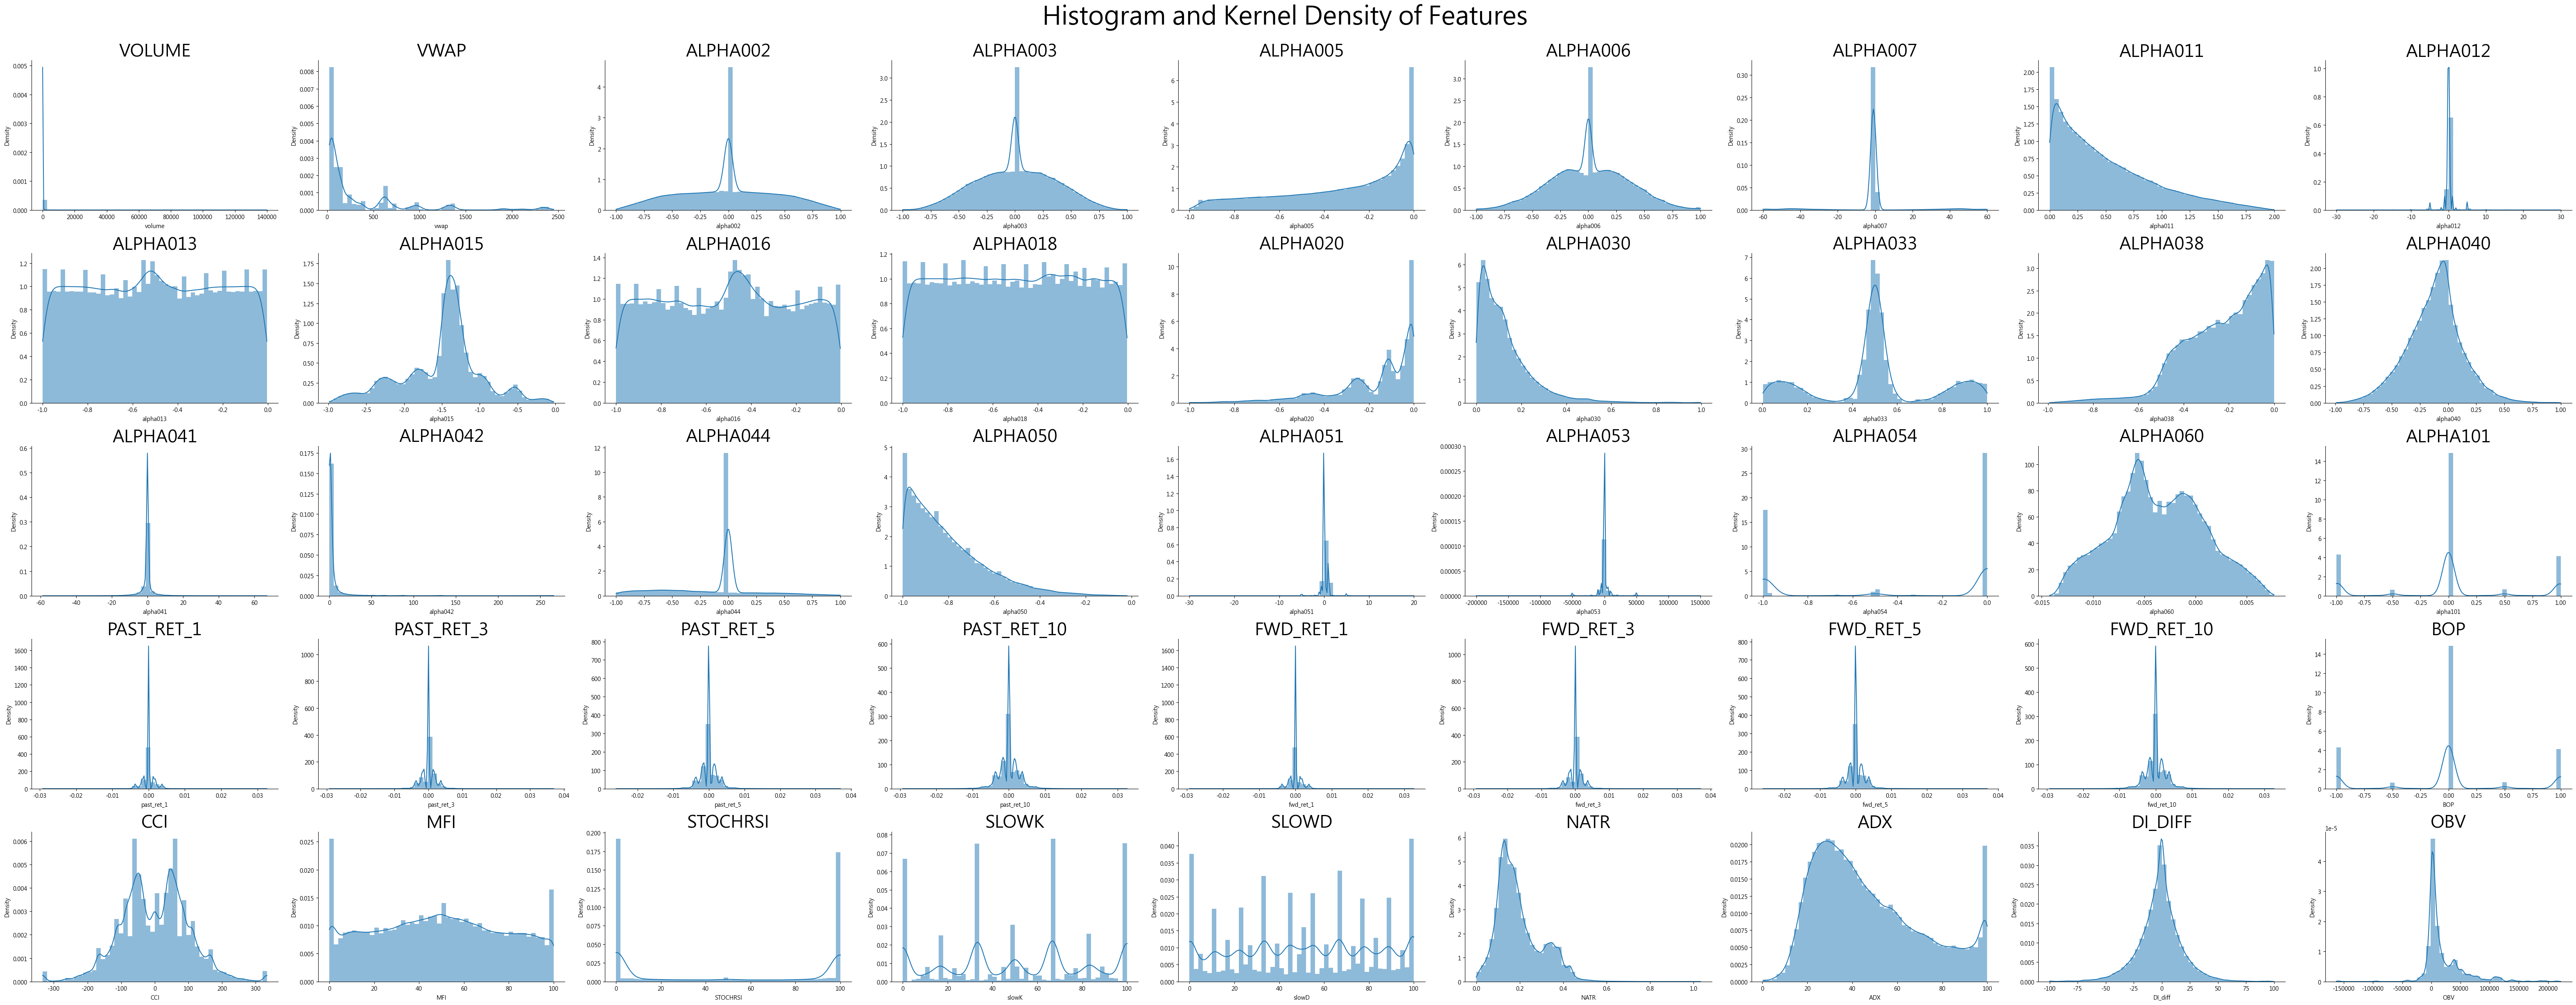

In [11]:
# ÊéíÈô§Áï∞Â∏∏ÔºàÊ®ôÊ∫ñÂ∑ÆÁÇ∫0ÊàñNaNÁöÑcolumnÔºâ
abnormal_col = stocks1.filter(items = ["alpha027", "alpha40", "alpha083"]).columns 

# ÊéíÈô§encoded column‰∏îÂè™‰øùÁïôÈÅéÂéª1,3,5,10ÂàÜÈêòÂ†±ÈÖ¨Áéácolumn
abandon_col = stocks1.filter(items = ['stock_encoded', 'day_encoded','time_encoded', 'close_10min', 'close_20min', 
                                      'open_10min','open_20min', 'past_ret_2', 'past_ret_4', 'past_ret_6', 'past_ret_7', 
                                      'past_ret_8', 'past_ret_9']).columns 

###### ‰ª•‰∏äÊéíÈô§ÁöÑcolumnÂè™ÊòØ‰∏çÂèÉËàáË¶ñË¶∫ÂåñÔºå‰ªçÊúÉÂä†ÂÖ•Ê®°ÂûãË®ìÁ∑¥ ######

features = stocks1.drop(delete_col, axis=1).drop(abnormal_col, axis=1).drop(abandon_col, axis=1).columns

# Ë®≠ÂÆöÂúñÂΩ¢Â§ßÂ∞èËàáÂ≠êÂúñ
ncols = 9
nrows = (len(features) + ncols - 1) // ncols  # Ëá™ÂãïÊ†πÊìöÁâπÂæµÊï∏ÈáèÊ±∫ÂÆöË°åÊï∏
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 7, nrows * 5))
axes = axes.flatten()

# Áπ™Âúñ
for i, feature in enumerate(features):
    ax=axes[i]
    sns.histplot(stocks1[feature], kde=True, ax=ax, bins=50, stat="density", linewidth=0)
    ax.set_title(feature.upper(), fontsize=30)
    
# Â§öÈ§òÂ≠êÂúñÊ∏ÖÁ©∫
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

sns.despine()
fig.suptitle("Histogram and Kernel Density of Features ", fontsize=44)
plt.tight_layout(rect = [0,0,1,0.98])
plt.show()

#### Heatmap of Features

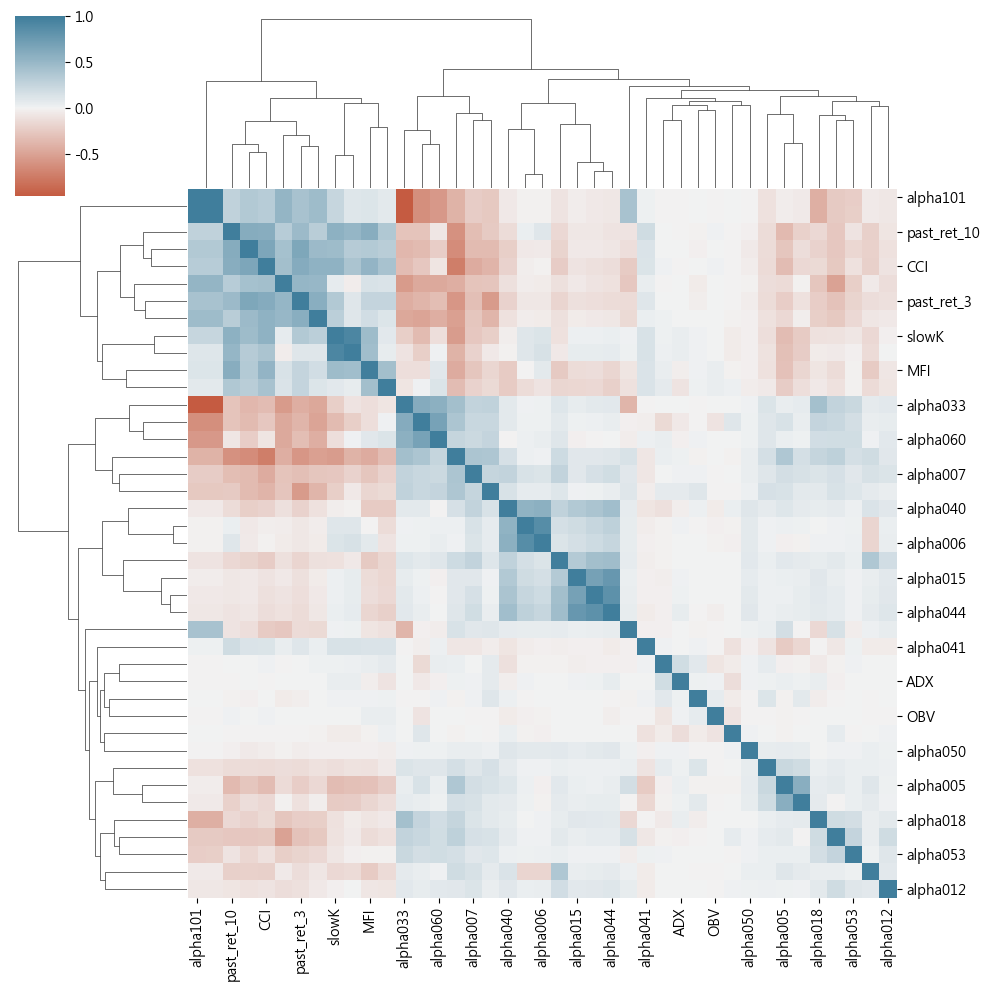

In [12]:
corr = stocks1.drop(ret_col, axis=1).drop(delete_col, axis=1).drop(abnormal_col, axis=1).drop(abandon_col, axis=1).corr()

sns.clustermap(corr, cmap = sns.diverging_palette(20, 230, as_cmap=True),
              center=0)
plt.show()

## Data Splitting

- Split the time-series data into training, validation, and testing sets.

- Employ rolling time windows to split data into 9 training-validation sets.

- Each training-validation set consists of 4 days of training data and 2 days of validation data.

- The last 5 trading days of data are retained as testing sets.

In [13]:
from sktime.forecasting.model_selection import SlidingWindowSplitter

class RollingTimeSeriesCV:
    """
    Generates tuples of train_idx, valid_idx pairs
    ÊåâÊó•ÊúüÂàÜÁµÑÔºåÈ†êË®≠ÊØèÊ¨°Ë®ìÁ∑¥4Â§©ÔºåÈ©óË≠â2Â§©ÔºåÊØèÊ¨°È©óË≠âÈñìÈöî2Â§©
    Êèê‰æõÂÖ©Á®ÆÁâàÊú¨ÔºöÈ†êË®≠n_splitÔºàÊö´‰∏çË®≠Ë®àÔºâ„ÄÅÈ†êË®≠Ë®ìÁ∑¥/È©óË≠âÊôÇÈñìÈï∑Â∫¶
    """
# ÂÖ±25Ê™îËÇ°Á•®ÔºåÊØèÊó•ÂàÜKË≥áÊñôÂÖ±266Á≠Ü
    def __init__(self, 
                 DATA=None,
                #  n_splits=5,
                 period_length=266,  # ÊØèÂÄãÂü∫Êú¨ÊôÇÈñìÊÆµÈï∑Â∫¶Ôºà‰æãÂ¶ÇÔºöÊØèÂ§©Êúâ266ÂàÜÈêòÁöÑË≥áÊñôÔºâ
                 train_day_length=4,  # ÊØèÊ¨°train 4Â§©Ë≥áÊñô
                 valid_day_length=2,  # ÊØèÊ¨°valid 2Â§©Ë≥áÊñô
                 step_day_length=2,  # È©óË≠âÈõÜÈñìÈöî2Â§©
                 test_day_length=5,  #testË≥áÊñôÂÖ±5Â§©
                #  lookahead=None,  # ÂæÄÂâçÈù¢ÁöÑÊôÇÈñìÂõûÊé®
                 date_idx='date'):
        self.DATA = DATA
        # self.n_splits = n_splits
        # self.lookahead = lookahead
        # self.period_length = period_length
        self.valid_length = int(valid_day_length * period_length)
        self.train_length = int(train_day_length * period_length)
        self.step_length = int(step_day_length * period_length)
        self.test_day_length = int(test_day_length * period_length)   

        self.date_idx = date_idx
        self.train_valid_time_idxs = []
        
        DATA_time_each = (self.DATA).index.get_level_values(self.date_idx)  #ÊØèÁ≠ÜË≥áÊñôÁöÑÊôÇÈñì
        self.DATA_time = DATA_time_each.unique()   # Ë≥áÊñôÁöÑÊôÇÈñìÂ∫è
        DATA_time_idx = [i for i,j in enumerate(self.DATA_time)]   # ÊôÇÈñìÂ∫èÁöÑidx
        self.test_times = self.DATA_time[-self.test_day_length:]
        self.test_time_idxs =  DATA_time_idx[-self.test_day_length:]

        
        # ÊúÄÂæå3Â§©Ë≥áÊñôÁï∂‰Ωútest dataÊúÄÂæå3Â§©Ë≥áÊñôÁï∂‰Ωútest data  
        self.DATA_test = (self.DATA).loc[DATA_time_each.isin(self.test_times),]
        self.DATA_train = (self.DATA).loc[~DATA_time_each.isin(self.test_times),]

        # cv = SlidingWindowSplitter(window_length=26600, fh=9975, step_length=9975)   
        self.cv = SlidingWindowSplitter(window_length=self.train_length, fh=range(1,self.valid_length+1), step_length=self.step_length) 

        # window_length: train data size, 
        # fh: test data size, 
        # step_length: length between each split

        self.unique_datetime = (self.DATA_train).index.get_level_values(self.date_idx).unique()  

    def split(self, y=None, groups=None):

        train_times = []  # Ë®ìÁ∑¥ÈõÜÊôÇÈñìÁ¥¢Âºï
        valid_times = []  # È©óË≠âÈõÜÊôÇÈñìÁ¥¢Âºï

        for train_idx, valid_idx in self.cv.split(self.unique_datetime):

            train_times = self.unique_datetime[train_idx]  # Ë®ìÁ∑¥ÈõÜÊôÇÈñìÁ¥¢Âºï
            valid_times = self.unique_datetime[valid_idx]  # Ë®ìÁ∑¥ÈõÜÊôÇÈñìÁ¥¢Âºï
        
        # for i in range(self.n_splits):
        #     train_start_idx = i * self.step_length
        #     train_end_idx = train_start_idx + self.train_length - 1
        #     test_start_idx = train_end_idx + self.lookahead + 1
        #     test_end_idx = test_start_idx + self.test_length - 1

        #     split_idx.append([train_start_idx, train_end_idx,
        #                       test_start_idx, test_end_idx])  # 0 21 20 146  # 21 42 41 167

            
            yield train_times, valid_times   # yieldËøîÂõûÁîüÊàêÂô®ÔºåÈÄêÊ≠•ÁîüÊàêÔºåÊö´ÂÅúÂü∑Ë°åËÄåÈùûÁ´ãÂç≥ÂÅúÊ≠¢
            # ÊØèÊ¨°Ëø¥ÂúàÈÉΩËº∏Âá∫

    def get_times(self):
        return self.DATA_time

    def get_cv_time_idx(self):
        # Ëø≠‰ª£Â≠òÂÑ≤ÊØèÊ¨°ÁöÑÊôÇÈñìÁ¥¢ÂºïÔºàÈùûÂéüÂßãË≥áÊñôÁ¥¢ÂºïÔºåÂç≥ÂêåÊôÇÈñìÂêåÂÄãÁ¥¢ÂºïÔºå‰∏çÂàÜtickerÔºâ

        for train_idx, valid_idx in self.cv.split(self.unique_datetime):
            self.train_valid_time_idxs.append((train_idx, valid_idx))  # Â≠òÂÑ≤ÊØèÊ¨°ÁöÑÁ¥¢ÂºïÂ∞ç

        return self.train_valid_time_idxs
    
    def get_train_valid_data(self):
        return self.DATA_train
    
    def get_test_data(self):
        return self.DATA_test

    def get_test_times(self):
        return self.test_times

    def get_test_time_idx(self):
        return  self.test_time_idxs

    def get_n_splits(self):
        return self.cv.get_n_splits(y=self.unique_datetime)


def get_cv(DATA=stocks1):
    return RollingTimeSeriesCV(
        DATA=DATA,
        period_length=266,  # ÊØèÂÄãÂü∫Êú¨ÊôÇÈñìÊÆµÈï∑Â∫¶Ôºà‰æãÂ¶ÇÔºöÊØèÂ§©Êúâ266ÂàÜÈêòÁöÑË≥áÊñôÔºâ
        train_day_length=4,  # ÊØèÊ¨°train 4Â§©Ë≥áÊñô
        valid_day_length=2,  # ÊØèÊ¨°valid 2Â§©Ë≥áÊñô
        step_day_length=2,  # È©óË≠âÈõÜÈñìÈöî2Â§©
        test_day_length=5,  #testË≥áÊñôÂÖ±5Â§©
        date_idx='date'
    )

### Time Distribution Plot of Training, Validation, Testing set

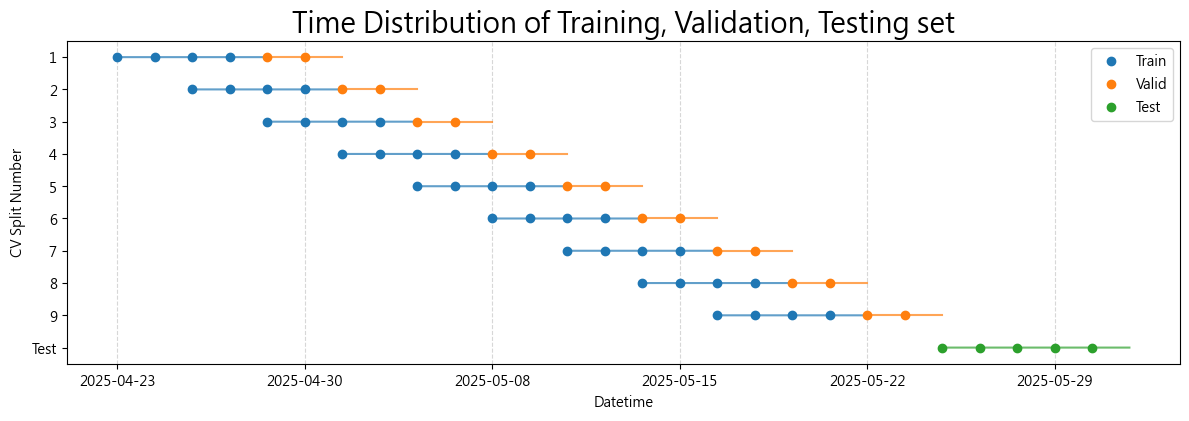

In [14]:
fig, ax = plt.subplots(figsize=(12, 4))
minutes_per_day = 266  # ÊØèÂ§©ÁöÑË≥áÊñôÈªûÊï∏Ôºà‰æãÂ¶ÇÔºöÊØèÂàÜÈêò1Á≠ÜÔºåÂÖ±266ÂàÜÈêòÔºâ
cv_splits = get_cv().get_n_splits()

for j, (train_idx, valid_idx) in enumerate(get_cv().get_cv_time_idx(), start=1):
    i = get_cv().get_n_splits() - j  # ÂèçÂêëÁ¥¢ÂºïÔºåÂæûÊúÄÂæå‰∏ÄÁµÑÈñãÂßãÁï´
    # Âè™ÂèñÊØèÂ§©‰∏ÄÂÄãÈªûÔºàÊØè266Á≠ÜÊäì‰∏ÄÊ¨°Ôºâ
    train_points = [i for i in train_idx if i % minutes_per_day == 0]
    valid_points = [i for i in valid_idx if i % minutes_per_day == 0]

    # Áï´ trainÔºàËóçËâ≤ÂúìÈªû+Á∑öÁ∑öÔºâ
    ax.plot(train_points, [i] * len(train_points), 'o', color='tab:blue', label='Train' if i == 0 else "")
    ax.plot(train_idx, [i] * len(train_idx), '-', color='tab:blue', alpha=0.7)

    # Áï´ validÔºàÊ©òËâ≤ÂúìÈªûÔºãÁ∑öÔºâ
    ax.plot(valid_points, [i] * len(valid_points), 'o', color='tab:orange', label='Valid' if i == 0 else "")
    ax.plot(valid_idx, [i] * len(valid_idx), '-', color='tab:orange', alpha=0.7)

test_idx = get_cv().get_test_time_idx()
test_points = [i for i in test_idx if i % minutes_per_day == 0]

ax.plot(test_points, [-1] * len(test_points), 'o', color='tab:green', label='Test')
ax.plot(test_idx, [-1] * len(test_idx), '-', color='tab:green', alpha=0.7)

# Ë®≠ÂÆö x Ëª∏Ê®ôÁ±§ÔºöÊØè5Â§©Ôºà5 √ó 266Ôºâ
xticks = np.arange(0, max(test_idx), 5 * minutes_per_day)
ax.set_xticks(xticks)
ax.set_xticklabels(get_cv().get_times()[xticks].date)
ax.set_xlabel("Datetime")

# Ë®≠ÂÆö Y Ëª∏È†ÜÂ∫èÂÄíËΩâ
yticks = list(range(-1,cv_splits))
ax.set_yticks(yticks)
ax.set_yticklabels(['Test']+[(cv_splits - i) for i in yticks if i>=0])
ax.set_ylim(-0.5 -1, cv_splits - 0.5)
ax.set_ylabel("CV Split Number")

ax.legend()
ax.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.title("Time Distribution of Training, Validation, Testing set", fontsize=20)
plt.show()

## Model Training --LightGBM

- Use `LightGBM` library to train LightGBM model to predict forward returns.

- Use `Optuna` library to efficiently optimize and select the best model parameters.

- Reference: https://github.com/stefan-jansen/machine-learning-for-trading/blob/main/12_gradient_boosting_machines/11_intraday_model.ipynb

### Customized Function for `LightGBM` Model

- Create a customized training function for flexible inputs and objectives.

- Use RMSE as the primary evaluation and early stopping metric, with a customed IC (Information Coeffecient) metric used as a supplementary reference metric.

- Saved the IC median stat and FI (Feature Importance) ratio of each model boosting rounds.

- ***NOTE***: 
    - **RMSE**: Default evaluation metric, used for monitoring the validation performance during training and serves as the criterion for early stopping.
    - **IC**: Reference metric, evaluate the correlation between predictions and true values, helping detect potential overfitting by comparing IC scores between training and validation sets.
    - **IC median stat**: Customed evaluation metric, the median of per-minute IC values within each fold, followed by taking the median across all validation folds, used as the optimization objective during Optuna hyperparameter tuning.


In [15]:
# Custom MetricÔºåevaluate model
from scipy.stats import spearmanr

def ic_lgbm(preds, train_data):
    """Custom IC eval metric for lightgbm"""
    is_higher_better = True
    y_true = train_data.get_label()
    if np.std(preds) == 0 or np.std(y_true) == 0:
        return 'ic', 0.0, True  # ÈÅøÂÖç NaN
    return 'ic', spearmanr(preds, train_data.get_label(), nan_policy='omit')[0], is_higher_better

## Save Results of every final model in boosting
# ICs (Metric) for results (every boosting round)
def get_scores(result):
    return pd.DataFrame({'train': result['training']['ic'],
                         'valid': result['valid_1']['ic']})

# Feature Importance Ratio for results
def get_fi(model):
    fi = model.feature_importance(importance_type='gain')
    return (pd.Series(fi / fi.sum(),
                      index=model.feature_name()))



### Main Model Setting

- Configure the LightGBM model parameters.

- Output the IC metric and feature importance for each CV process.

- Compute the predicted values for each result and calculate the per-minute correlation between actual and predicted values (IC stat).

In [16]:
# ‰∫§ÂèâÈ©óË≠âË®ìÁ∑¥Ê®°ÂûãË®≠ÂÆö

def fit_lgb_cv(lgb_params, target, data=stocks1, num_boost_round=300, debug=False):

  # start = dt.datetime.now()  
  
  # save all IC scores (per boosting), median IC (groupby minutes), feature importance, predicted data for each folds
  # IC metric (IC scores): ÊØèÂÄãboosting round‰∏ÄÂÄãÂÄºÔºåÊúÉÊåÅÁ∫åÊîπÈÄ≤ÔºàÂÖ∂È§òstatÈÉΩÂè™Ëº∏Âá∫final modelÁöÑÂÄºÔºâ
  # IC stat (median IC): Ë®àÁÆóÊØèÂàÜÈêòÂêÑtickerÁöÑÂØ¶Èöõ/È†êÊ∏¨corr coef.ÔºåÂÜçÂèñÊâÄÊúâÊôÇÈñìÁöÑ‰∏≠‰ΩçÊï∏
  all_ic_metric = []
  all_ic_stat = []
  all_fi = []
  all_preds = []

  for fold, (train_times, valid_times) in enumerate(get_cv(DATA=data).split(), 1):
    
    # create lgb train set
    train_set = data.loc[train_times, :].drop(delete_col, axis=1) #ÂéªÊéâÈùûint, float, boolÁöÑÊ¨Ñ‰Ωç
    lgb_train = lgb.Dataset(data=train_set.drop(ret_col, axis=1),
                            label=train_set[target],
                            categorical_feature='stock_encoded')
    
    # create lgb valid set
    valid_set = data.loc[valid_times, :].drop(delete_col, axis=1)
    lgb_valid = lgb.Dataset(data=valid_set.drop(ret_col, axis=1),
                          label=valid_set[target],
                          categorical_feature='stock_encoded', 
                          reference=lgb_train)

    # train model
    evals_result = {}
    model = lgb.train(params=lgb_params,
                      train_set=lgb_train,
                      valid_sets=[lgb_train, lgb_valid],
                    #   valid_names=valid_names,
                      feval=ic_lgbm,
                      num_boost_round=num_boost_round,
                      callbacks=[
                        # boostingÈÅéÁ®ãËã•50Ëº™‰πãÂæåIC‰ªçÊú™Â¢ûÂä†min_deltaÔºà‰ΩøÁî®È†êË®≠ÂÄº=0ÔºâÔºåÂâáÊèêÂâçÁµÇÊ≠¢
                        lgb.early_stopping(stopping_rounds=50, verbose=False),  
                        lgb.record_evaluation(evals_result),
                        lgb.log_evaluation(period=0)
                        ]
                    #   evals_result=evals_result,
                    #   verbose_eval=50
                      )
    
    ### Save IC metric and Feature importance
    # get train/valid ic scores (of every boosting round)
    scores = get_scores(evals_result)
    all_ic_metric.append(scores)

    # get feature importance (of final model)
    fi = get_fi(model)  
    all_fi.append(fi)

    # generate validation predictions
    valid_X = valid_set.loc[:, model.feature_name()]
    valid_y = valid_set.loc[:, [target]]
    valid_y['pred'] = model.predict(valid_X)
    all_preds.append(valid_y)

    # compute average IC of all minutes (per fold)
    by_minute = valid_y.groupby(valid_set.index.get_level_values('date'))  # IC per minute (of all tickers)
    ic_stat = by_minute.apply(lambda x: spearmanr(x[target], x.pred)[0]).median()  # median IC of all minutes 
    all_ic_stat.append(ic_stat)

    # m, s = divmod((dt.datetime.now()-start).total_seconds(), 60)
    # h, m = divmod(m, 60)

    # print(f'\nFold: {fold:02} | {int(h):02}:{int(m):02}:{s:05.2f} | IC per minute: {daily_ic:.2%}\n')

    if debug:
      break  # debug Ê®°ÂºèÂè™Ë∑ë 1 fold
    
  return dict(all_ic_metric=all_ic_metric, all_preds=all_preds, all_ic_stat=np.median(all_ic_stat), all_fi=all_fi), model  #np.median(all_daily_ic)


### Tuning Parameters by `Optuna`

- Define fixed parameters for the LightGBM model and specified the search space for hyperparameter optimization.

- Optimize the model to maximize the median of the IC median stat (i.e., the correlation coefficient between actual and predicted values per minute), and save the model result with the best IC median performance.












In [17]:
MODEL_PATH = 'c:\\python_vs\\strategy\\hft_1\\lgb'

In [18]:
# optunaË™øÂèÉÔºàlightgbmÂéüÁîüÊîØÊè¥Ôºå‰∏çÈúÄÈúÄÂÜçÁî®grid cv!!!Ôºâ

def objective(trial, target, NUM_BOOST_ROUND):
    # ÂÆöÁæ©Ë¶ÅÂÑ™ÂåñÁöÑË∂ÖÂèÉÊï∏
    lgb_params = {
        'seed': 320,
        'objective': 'regression',
        'metric': ['rmse'],  # ‰ª•Ê≠§ÂÅöboostingÁöÑearly stopping „ÄÅËº∏Âá∫ logÔºåIC metricÂè™Áî®‰æÜÈ°ØÁ§∫ÔºåIC median by minuteÊòØÁî®‰æÜtune
        'verbosity': -1,  #ÂèØÊ∂àÈô§Êìæ‰∫∫ÁöÑ WARNING "[LightGBM] [Warning] No further splits with positive gain, best gain: -inf"
        # < 0: Fatal, = 0: Error (Warning), = 1: Info, > 1: Debug
        'boosting_type': 'gbdt',
        'gpu_use_dp' : False,
        'learning_rate': trial.suggest_float('learning_rate', 0.00005, 0.2, log=True), #Áî®log-uniformÊäΩÔºàËÄåÈùûÁ∑öÊÄßÂèñÊ®£ÔºâÂèØËÉΩÁöÑÂ≠∏ÁøíÁéá
        'num_leaves': trial.suggest_int('num_leaves', 8, 128),
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 10, 1000),
        'feature_fraction': trial.suggest_float('feature_fraction', 0.6, 1.0),
        'bagging_fraction': trial.suggest_float('bagging_fraction', 0.6, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 10),
        'lambda_l1': trial.suggest_float('lambda_l1', 0.0000001, 1, log=True),  #Lasso
        'lambda_l2': trial.suggest_float('lambda_l2', 0.0000001, 1, log=True),  #Ridge
    }

    # CV model fit
    res, model = fit_lgb_cv(lgb_params, target, data=stocks1, num_boost_round=NUM_BOOST_ROUND, debug=False)

    # Ëá™ÂãïÂª∫Á´ãË≥áÊñôÂ§æ
    os.makedirs(f'{MODEL_PATH}\\{target}\\best_model', exist_ok=True)
    
    # ÂÑ≤Â≠òÊúÄ‰Ω≥Ê®°ÂûãËàáÈôÑÂä†ÁµêÊûúÔºàic_metric, pred data, fi)
    if trial.number == 0 or res['all_ic_stat'] > trial.study.best_value:

        model.save_model(f'{MODEL_PATH}\\{target}\\best_model\\model_{trial.number:02}.txt')

        # save validation predictions
        pd.concat(res['all_preds'], axis=0).to_hdf(f'{MODEL_PATH}\\{target}\\res.h5', key = f'preds/{trial.number:02}')

        # save feature importance
        pd.concat(res['all_fi'], axis=1).to_hdf(f'{MODEL_PATH}\\{target}\\res.h5', key = f'fi/{trial.number:02}')
    
    # ÂõûÂÇ≥È©óË≠âÈõÜÁöÑIC (by folds, groupby minutes)Ôºå‰ΩúÁÇ∫Ë™øÂèÉÊåáÊ®ô‰æùÊìö
    return res['all_ic_stat']

# res, model = fit_lgb_cv(lgb_params=lgb_params, target=ret_col[0], data=stocks1, num_boost_round=50)
# res['all_ic_metric_mean'][1]
# pd.concat(res['all_preds'], axis=0)
# res['all_ic_stat']

### Additional Setting (early stopping, progressor bar)

Implement an early stopping function and added a progress bar to monitor the optimization process in real time

In [19]:
# Ëá™ÂÆöÁæ© Early Stopping callbackÔºàÈÅøÂÖçÊµ™Ë≤ªÊôÇÈñìÂÅöÁÑ°ÊÑèÁæ©ÁöÑparameter tuningÔºâ
class NoProgressEarlyStopper:
    def __init__(self, patience=10, min_delta=0.01):  # patience: trialÂÄãÊï∏Ôºåmin_delta: ÂèØÂøçÂèóÁöÑÁØÑÂúçÔºåÈ†êË®≠ÁÇ∫0.01ÔºàÂç≥10Ê¨°trialÂÖßICÂ¢ûÂä†‰∏çÂà∞1%Â∞±ÂÅúÊ≠¢Ôºâ
        self.patience = patience
        self.min_delta = min_delta
        self.best = -float('inf')
        self.counter = 0

    def __call__(self, study, trial):
        if trial.value > self.best + self.min_delta:
            self.best = trial.value
            self.counter = 0
        else:
            self.counter += 1
        if self.counter >= self.patience:
            print(f"\n‚õîEarly stopping‚õî: No IC improvement > {self.min_delta} for {self.patience} trials.\n")
            study.stop()

# Ë£Ω‰ΩúÈÄ≤Â∫¶Ê¢ù
class TQDMCallback:
    def __init__(self, total, desc='Optuna'):

        self.pbar = tqdm(total=total, desc=desc)
        self.last_time = time.time()

    def __call__(self, study, trial):
        elapsed = time.time() - self.last_time
        self.pbar.set_postfix({   # ÈÄ≤Â∫¶Ê¢ùÊóÅÈÇäË¶ÅÊîæÁöÑÊïòËø∞
            'Trial': trial.number,
            'IC': f"{trial.value:.4f}" if trial.value else 'None',
            'Best_IC': f"{study.best_value:.4f}" if study.best_value else 'None',
            'Elapsed': f"{elapsed:.1f}s"
        })
        self.pbar.update(1)
        self.last_time = time.time()

    def close(self):
        self.pbar.close()

### Run Models

- Train and optimize models separately for the expected returns over the next 1, 3, 5, and 10 minutes.

- Perform up to 50 rounds of hyperparameter tuning, with early stopping if the IC median don't improve by more than 0.005 for 10 consecutive rounds.

- Conduct up to 200 boosting iterations per cross-validation fold, with early termination if the IC metric don't improve over 50 consecutive iterations.

- Return a progress bar and reported the IC metric and RMSE for the final boosting result of each CV fold (NOTE: RMSE is just for reference and not used as the boosting evaluation metric)











In [ ]:
N_TRIALS=50  # optunaË©¶È©óÊ¨°Êï∏ÔºàË©¶È©óÂèÉÊï∏ÁµÑÂêàÂÄãÊï∏Ôºâ
from optuna.samplers import TPESampler

for target in ret_col:
    print(f'\nüéØ Tuning {target}')
    study = optuna.create_study(direction='maximize', 
                                sampler=TPESampler(seed=320))  # Ë®≠ÂÆöÈö®Ê©üÁ®ÆÂ≠ê
    
    tqdm_cb = TQDMCallback(total=N_TRIALS, desc=f"Tuning {target}")

    # Ëã•IC medianÂ∑≤10Ëº™Êú™Ë∂ÖÈÅéÊúÄ‰Ω≥IC+0.005ÔºåÂâáÊèêÂâçÁµÇÊ≠¢Ë©¶È©ó
    early_stopper = NoProgressEarlyStopper(patience=10, min_delta=0.005)   

    study.optimize(
        func=partial(objective, target=target, NUM_BOOST_ROUND=200),  # ÊØèÂÄãCVÂÖßÁöÑboostingÊ¨°Êï∏Ê∏õÂ∞ëÁÇ∫200Ê¨°ÔºåÂê¶ÂâáÊ®°ÂûãË∑ëÂ§™ÊÖ¢
        n_trials=N_TRIALS,
        callbacks=[tqdm_cb, early_stopper]
    )

    tqdm_cb.close()

    # ÂÑ≤Â≠òÁµêÊûú
    print(f'\n‚úÖ Best IC for {target}: {study.best_value:.4f}')
    print(f'Best Params: {study.best_params}')
    # study.trials_dataframe().to_csv(f'{MODEL_PATH}\\{target}\\optuna_trials.csv')
    study.trials_dataframe().to_hdf(f'{MODEL_PATH}\\{target}\\optuna_trials_df_{target}.h5', key = f'30trial/{target}')
    joblib.dump(study, f"hft_1\\study_{target}.pkl")  # Êö´Â≠òË™øÂèÉÁµêÊûú


[I 2025-06-18 14:33:16,768] A new study created in memory with name: no-name-e22fb9b5-6806-4b13-beb7-9d8c75517d8e



üéØ Tuning fwd_ret_1


Tuning fwd_ret_1:   0%|          | 0/50 [00:00<?, ?it/s]

[I 2025-06-18 14:33:50,415] Trial 0 finished with value: 0.488050265690042 and parameters: {'learning_rate': 0.01871181499161782, 'num_leaves': 38, 'min_data_in_leaf': 994, 'feature_fraction': 0.760276734057599, 'bagging_fraction': 0.8833647412459711, 'bagging_freq': 7, 'lambda_l1': 1.4170434879718098e-07, 'lambda_l2': 3.4654832109897166e-07}. Best is trial 0 with value: 0.488050265690042.
[I 2025-06-18 14:34:35,978] Trial 1 finished with value: 0.4793660972613936 and parameters: {'learning_rate': 0.00772508763381607, 'num_leaves': 14, 'min_data_in_leaf': 141, 'feature_fraction': 0.96558952322597, 'bagging_fraction': 0.8025356742196108, 'bagging_freq': 5, 'lambda_l1': 0.0064252377953043565, 'lambda_l2': 0.0001915686678532447}. Best is trial 0 with value: 0.488050265690042.
[I 2025-06-18 14:35:24,487] Trial 2 finished with value: 0.4767124048826483 and parameters: {'learning_rate': 0.006397403673691805, 'num_leaves': 120, 'min_data_in_leaf': 556, 'feature_fraction': 0.7526293178205452, 


‚õîEarly stopping‚õî: No IC improvement > 0.005 for 10 trials.


‚úÖ Best IC for fwd_ret_1: 0.4967
Best Params: {'learning_rate': 0.03571214181325229, 'num_leaves': 97, 'min_data_in_leaf': 10, 'feature_fraction': 0.882007900446725, 'bagging_fraction': 0.8236475356666716, 'bagging_freq': 3, 'lambda_l1': 0.0013071385227891878, 'lambda_l2': 6.074047902345328e-06}

üéØ Tuning fwd_ret_3


Tuning fwd_ret_3:   0%|          | 0/50 [00:00<?, ?it/s]

[I 2025-06-18 14:47:38,107] Trial 0 finished with value: 0.46738187967705136 and parameters: {'learning_rate': 0.01871181499161782, 'num_leaves': 38, 'min_data_in_leaf': 994, 'feature_fraction': 0.760276734057599, 'bagging_fraction': 0.8833647412459711, 'bagging_freq': 7, 'lambda_l1': 1.4170434879718098e-07, 'lambda_l2': 3.4654832109897166e-07}. Best is trial 0 with value: 0.46738187967705136.
[I 2025-06-18 14:48:34,141] Trial 1 finished with value: 0.46413355070008155 and parameters: {'learning_rate': 0.00772508763381607, 'num_leaves': 14, 'min_data_in_leaf': 141, 'feature_fraction': 0.96558952322597, 'bagging_fraction': 0.8025356742196108, 'bagging_freq': 5, 'lambda_l1': 0.0064252377953043565, 'lambda_l2': 0.0001915686678532447}. Best is trial 0 with value: 0.46738187967705136.
[I 2025-06-18 14:49:29,529] Trial 2 finished with value: 0.44640672396790504 and parameters: {'learning_rate': 0.006397403673691805, 'num_leaves': 120, 'min_data_in_leaf': 556, 'feature_fraction': 0.7526293178


‚õîEarly stopping‚õî: No IC improvement > 0.005 for 10 trials.


‚úÖ Best IC for fwd_ret_3: 0.4728
Best Params: {'learning_rate': 0.03372418233036693, 'num_leaves': 89, 'min_data_in_leaf': 34, 'feature_fraction': 0.7656793607539606, 'bagging_fraction': 0.7736080295797994, 'bagging_freq': 2, 'lambda_l1': 0.002866132492265333, 'lambda_l2': 0.00011923808959920814}

üéØ Tuning fwd_ret_5


Tuning fwd_ret_5:   0%|          | 0/50 [00:00<?, ?it/s]

[I 2025-06-18 14:57:14,894] Trial 0 finished with value: 0.4678283391287636 and parameters: {'learning_rate': 0.01871181499161782, 'num_leaves': 38, 'min_data_in_leaf': 994, 'feature_fraction': 0.760276734057599, 'bagging_fraction': 0.8833647412459711, 'bagging_freq': 7, 'lambda_l1': 1.4170434879718098e-07, 'lambda_l2': 3.4654832109897166e-07}. Best is trial 0 with value: 0.4678283391287636.
[I 2025-06-18 14:58:06,556] Trial 1 finished with value: 0.4563694055688813 and parameters: {'learning_rate': 0.00772508763381607, 'num_leaves': 14, 'min_data_in_leaf': 141, 'feature_fraction': 0.96558952322597, 'bagging_fraction': 0.8025356742196108, 'bagging_freq': 5, 'lambda_l1': 0.0064252377953043565, 'lambda_l2': 0.0001915686678532447}. Best is trial 0 with value: 0.4678283391287636.
[I 2025-06-18 14:58:56,670] Trial 2 finished with value: 0.45663172145434383 and parameters: {'learning_rate': 0.006397403673691805, 'num_leaves': 120, 'min_data_in_leaf': 556, 'feature_fraction': 0.75262931782054


‚õîEarly stopping‚õî: No IC improvement > 0.005 for 10 trials.


‚úÖ Best IC for fwd_ret_5: 0.4678
Best Params: {'learning_rate': 0.01871181499161782, 'num_leaves': 38, 'min_data_in_leaf': 994, 'feature_fraction': 0.760276734057599, 'bagging_fraction': 0.8833647412459711, 'bagging_freq': 7, 'lambda_l1': 1.4170434879718098e-07, 'lambda_l2': 3.4654832109897166e-07}

üéØ Tuning fwd_ret_10


Tuning fwd_ret_10:   0%|          | 0/50 [00:00<?, ?it/s]

[I 2025-06-18 15:04:38,153] Trial 0 finished with value: 0.48611535728242994 and parameters: {'learning_rate': 0.01871181499161782, 'num_leaves': 38, 'min_data_in_leaf': 994, 'feature_fraction': 0.760276734057599, 'bagging_fraction': 0.8833647412459711, 'bagging_freq': 7, 'lambda_l1': 1.4170434879718098e-07, 'lambda_l2': 3.4654832109897166e-07}. Best is trial 0 with value: 0.48611535728242994.
[I 2025-06-18 15:05:21,216] Trial 1 finished with value: 0.47734035862091817 and parameters: {'learning_rate': 0.00772508763381607, 'num_leaves': 14, 'min_data_in_leaf': 141, 'feature_fraction': 0.96558952322597, 'bagging_fraction': 0.8025356742196108, 'bagging_freq': 5, 'lambda_l1': 0.0064252377953043565, 'lambda_l2': 0.0001915686678532447}. Best is trial 0 with value: 0.48611535728242994.
[I 2025-06-18 15:06:06,782] Trial 2 finished with value: 0.471721133974025 and parameters: {'learning_rate': 0.006397403673691805, 'num_leaves': 120, 'min_data_in_leaf': 556, 'feature_fraction': 0.752629317820


‚õîEarly stopping‚õî: No IC improvement > 0.005 for 10 trials.


‚úÖ Best IC for fwd_ret_10: 0.4958
Best Params: {'learning_rate': 0.04854178874929791, 'num_leaves': 41, 'min_data_in_leaf': 412, 'feature_fraction': 0.7101422103373515, 'bagging_fraction': 0.740909578875623, 'bagging_freq': 8, 'lambda_l1': 1.0690638652036372e-07, 'lambda_l2': 5.202248543983376e-06}


In [ ]:
for target in ret_col:
    study = joblib.load(f"hft_1\\study_{target}.pkl")
    
    print(f'Label: {target}')
    print(f'Best Params: {study.best_params}')
    

Label: fwd_ret_1
Best Params: {'learning_rate': 0.03571214181325229, 'num_leaves': 97, 'min_data_in_leaf': 10, 'feature_fraction': 0.882007900446725, 'bagging_fraction': 0.8236475356666716, 'bagging_freq': 3, 'lambda_l1': 0.0013071385227891878, 'lambda_l2': 6.074047902345328e-06}
Label: fwd_ret_3
Best Params: {'learning_rate': 0.03372418233036693, 'num_leaves': 89, 'min_data_in_leaf': 34, 'feature_fraction': 0.7656793607539606, 'bagging_fraction': 0.7736080295797994, 'bagging_freq': 2, 'lambda_l1': 0.002866132492265333, 'lambda_l2': 0.00011923808959920814}
Label: fwd_ret_5
Best Params: {'learning_rate': 0.01871181499161782, 'num_leaves': 38, 'min_data_in_leaf': 994, 'feature_fraction': 0.760276734057599, 'bagging_fraction': 0.8833647412459711, 'bagging_freq': 7, 'lambda_l1': 1.4170434879718098e-07, 'lambda_l2': 3.4654832109897166e-07}
Label: fwd_ret_10
Best Params: {'learning_rate': 0.04854178874929791, 'num_leaves': 41, 'min_data_in_leaf': 412, 'feature_fraction': 0.7101422103373515, 

Label: fwd_ret_1


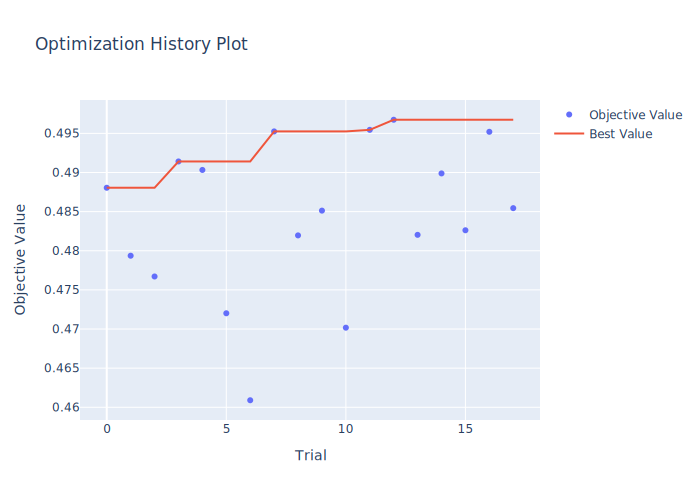

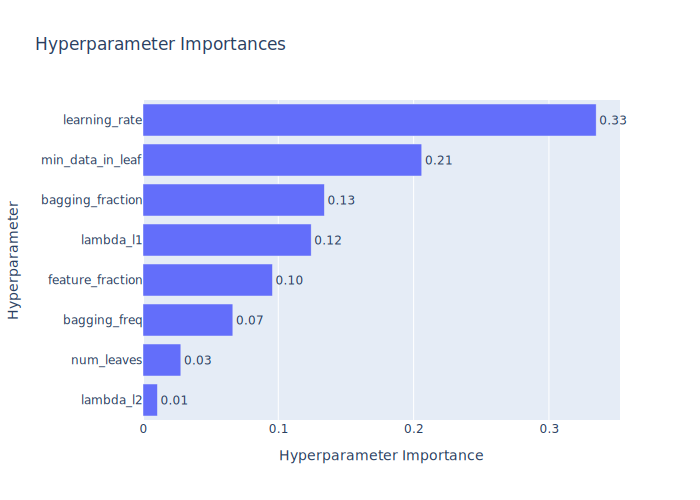

Label: fwd_ret_3


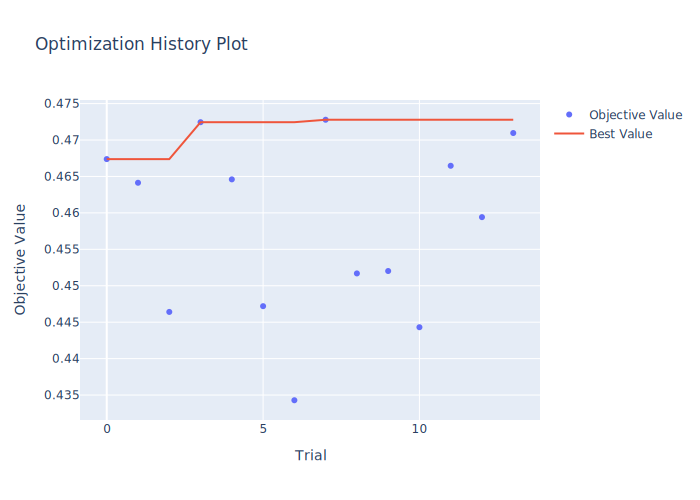

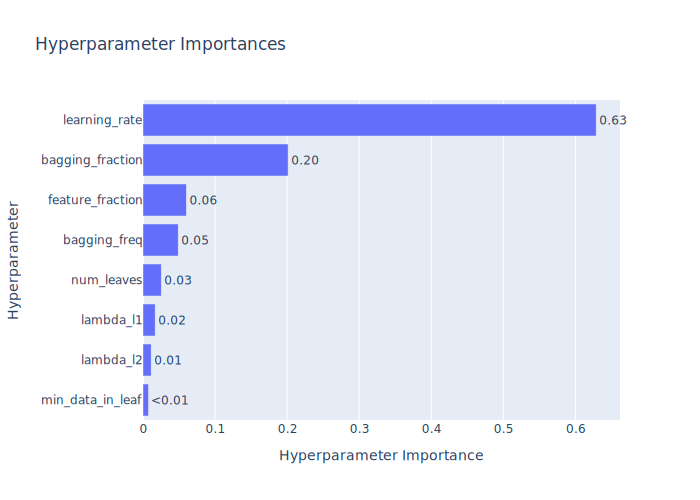

Label: fwd_ret_5


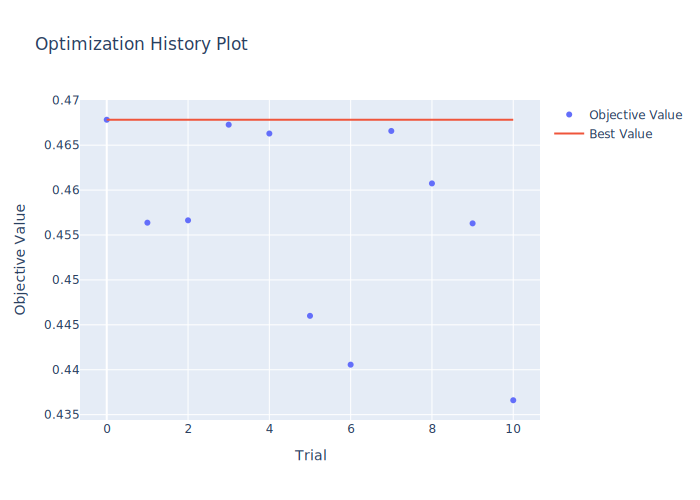

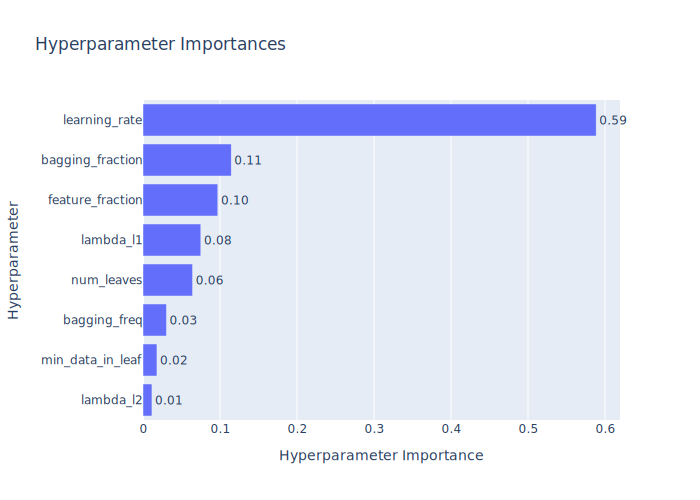

Label: fwd_ret_10


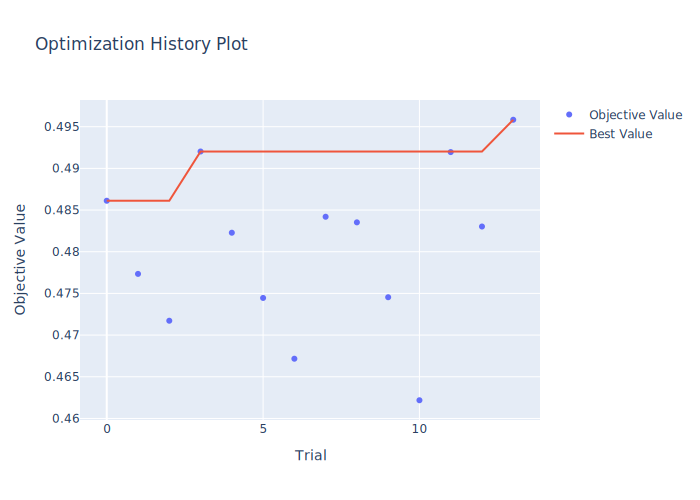

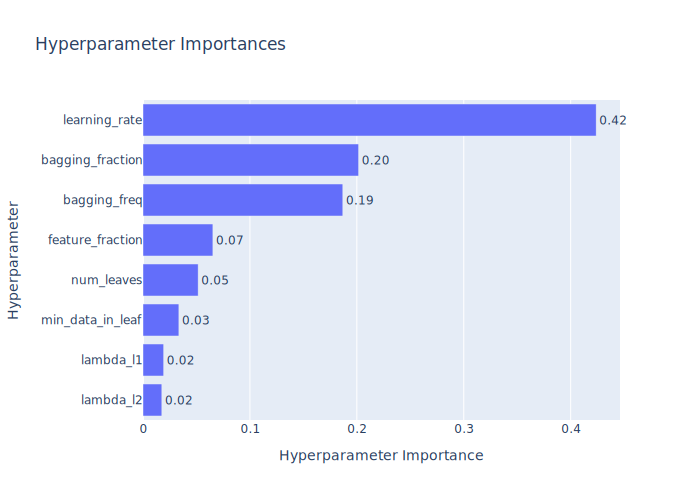

In [230]:
# res0 = pd.read_hdf(f'{MODEL_PATH}\\{target}\\optuna_trials_df_{target}.h5', key = f'50trial/{target}')
import optuna.visualization as vis

for target in ret_col:
    study = joblib.load(f"hft_1\\study_{target}.pkl")
    # Áï´Âúñ
    print(f'Label: {target}')

    show_plotly(vis.plot_optimization_history(study))   # fig_name=f'optuna_history_{target}'
    show_plotly(vis.plot_param_importances(study)) # fig_name=f'optuna_param_imp_{target}'

## Model Testing

Apply the best parameters from the final model to predict on the test set.

In [23]:
# ‰∫§ÂèâÈ©óË≠âË®ìÁ∑¥Ê®°ÂûãË®≠ÂÆö

def fit_lgb_test(lgb_params, target, train_data, test_data, num_boost_round=300):

  # start = dt.datetime.now()  

  # save all IC scores (per boosting), median IC (groupby minutes), feature importance, predicted data for each folds
  # IC scores: ÊØèÂÄãboosting round‰∏ÄÂÄãÂÄºÔºåÊúÉÊåÅÁ∫åÊîπÈÄ≤
  # median IC: Ë®àÁÆóÊØèÂàÜÈêòÂêÑtickerÁöÑÂØ¶Èöõ/È†êÊ∏¨corrÔºåÂÜçÂèñÊâÄÊúâÊôÇÈñìÁöÑ‰∏≠‰ΩçÊï∏
    
  # create lgb train, test set
  train_set = train_data.loc[:, ~train_data.columns.isin([delete_col])] #ÂéªÊéâÈùûint, float, boolÁöÑÊ¨Ñ‰Ωç
  test_set = test_data.loc[:, ~test_data.columns.isin([delete_col])] 

  lgb_train = lgb.Dataset(data=train_set.drop(ret_col, axis=1),
                          label=train_set[target],
                          categorical_feature='stock_encoded')
  
  # train model (not need to valid now)
  evals_result={}
  model = lgb.train(params=lgb_params,
                    train_set=lgb_train,
                  #   valid_names=valid_names,
                    feval=ic_lgbm,
                    num_boost_round=num_boost_round,
                    callbacks=[
                      # lgb.early_stopping(stopping_rounds=50),
                      lgb.record_evaluation(evals_result)
                      ]
                  #   evals_result=evals_result,
                  #   verbose_eval=50
                    )
  
  # generate testing data predictions
  test_X = test_set.loc[:, model.feature_name()]
  test_y = test_set.loc[:, [target]]
  test_y['pred'] = model.predict(test_X)

  # get train/valid ic scores (during every boosting round, of all data)
  # scores = get_scores(evals_result)

  # compute IC of all minutes 
  by_minute = test_y.groupby(test_set.index.get_level_values('date'))  # IC per minute (of all tickers)
  ic_per_minute = by_minute.apply(lambda x: spearmanr(x[target], x.pred, nan_policy='omit')[0])  

  # get feature importance
  fi = get_fi(model)

  # m, s = divmod((dt.datetime.now()-start).total_seconds(), 60)
  # h, m = divmod(m, 60)

  # print(f'\nFold: {fold:02} | {int(h):02}:{int(m):02}:{s:05.2f} | IC per minute: {daily_ic:.2%}\n')

    
  return dict(preds=test_y, ic_stat=ic_per_minute, all_fi=fi), model  #np.median(all_daily_ic)


In [24]:
stocks1_test = get_cv(DATA=stocks1).get_test_data().drop(delete_col, axis=1)
stocks1_train = get_cv(DATA=stocks1).get_train_valid_data().drop(delete_col, axis=1)

test_res = {}
test_model = {}

fixed_params = {
        'seed': 32,
        'objective': 'regression',
        'metric': ['rmse'],
        'verbosity': -1,  #ÂèØÊ∂àÈô§Êìæ‰∫∫ÁöÑ WARNING "[LightGBM] [Warning] No further splits with positive gain, best gain: -inf"
        'boosting_type': 'gbdt',
        'gpu_use_dp' : False}

### Êääbest_paramÊîæÂÖ•lgbÊ®°ÂûãÈÖçÈÅ©test data
for target in ret_col:
    study = joblib.load(f"study_{target}.pkl")
    final_params = {**fixed_params, **study.best_params}  # combine fixed params and tuned params
    test_res[f'{target}'], test_model[f'{target}'] = fit_lgb_test(lgb_params=final_params,
                                                                target=target,
                                                                train_data=stocks1_train, 
                                                                test_data=stocks1_test, 
                                                                num_boost_round=300)


### Feature Importance Plot

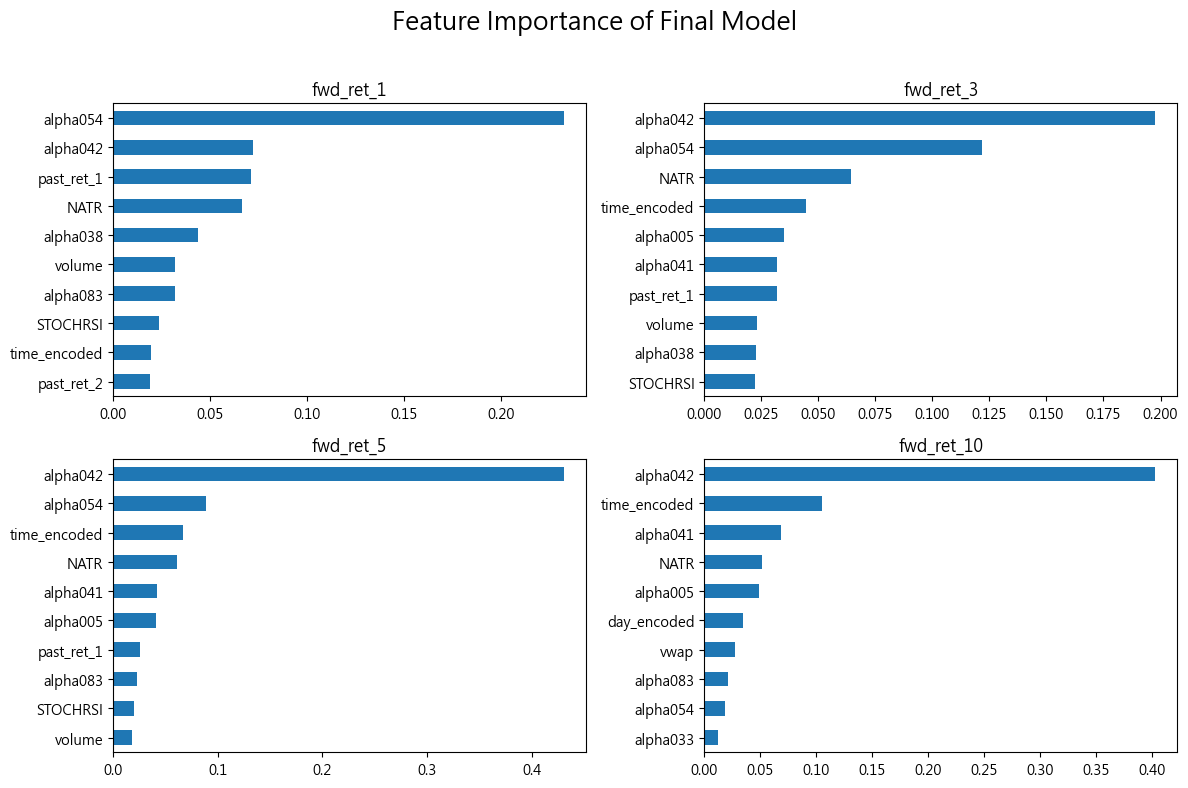

In [25]:
### fi bar plot

num_plots = len(ret_col)
fig, axes = plt.subplots(nrows=int(num_plots/2) , ncols=2, figsize=(12, 2 * num_plots))
                         
for idx, target in enumerate(ret_col):
    row, col = divmod(idx, 2)
    test_res[target]['all_fi'].sort_values(ascending=True).tail(10).\
        plot(kind='barh', title=f"{target}", ax = axes[row, col])

fig.suptitle('Feature Importance of Final Model', fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [26]:
# target = ret_col[0] # fwd_ret_1
# yy = test_res[target]['preds'].copy()
# K = 12
# by_minute = yy.groupby(yy.index.get_level_values('date'), group_keys=False)
# yy['decile'] = by_minute.apply(lambda x: pd.qcut(x.pred, q=K, labels=list(range(1,K+1)), duplicates='raise').astype(int))
# def compute_intraday_returns_by_quantile(predictions, quantile='quintile'):
#     by_quantile = yy.reset_index().groupby(['date', quantile])
#     return by_quantile[target].mean().unstack(quantile).sort_index()   # ÂêåÊôÇÈñì‰∏çÂêåtickerÂèñmean

# intraday_returns = compute_intraday_returns_by_quantile(yy, quantile='decile')

# (intraday_returns.sort_index().add(1).sub(0.2/10000).cumprod().sub(1)).plot()

### SHAP Feature Importance

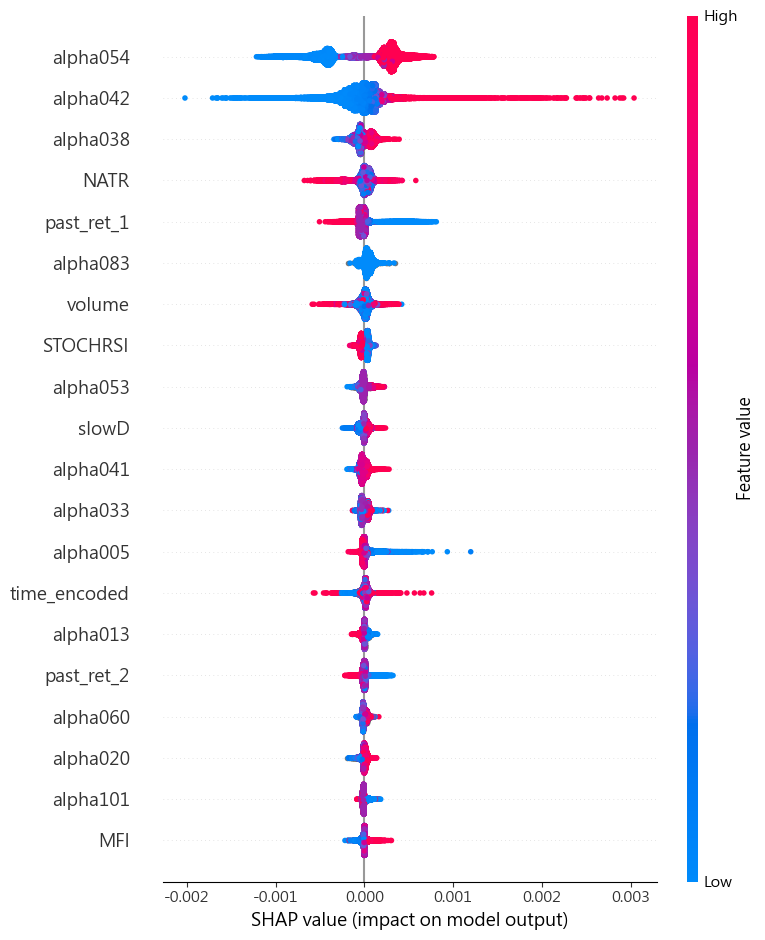

In [27]:
### SHAP fi plot
explainer = shap.TreeExplainer(test_model['fwd_ret_1'])
shap_values = explainer.shap_values(stocks1_test.drop(ret_col, axis=1) )
shap.summary_plot(shap_values, stocks1_test.drop(ret_col, axis=1))

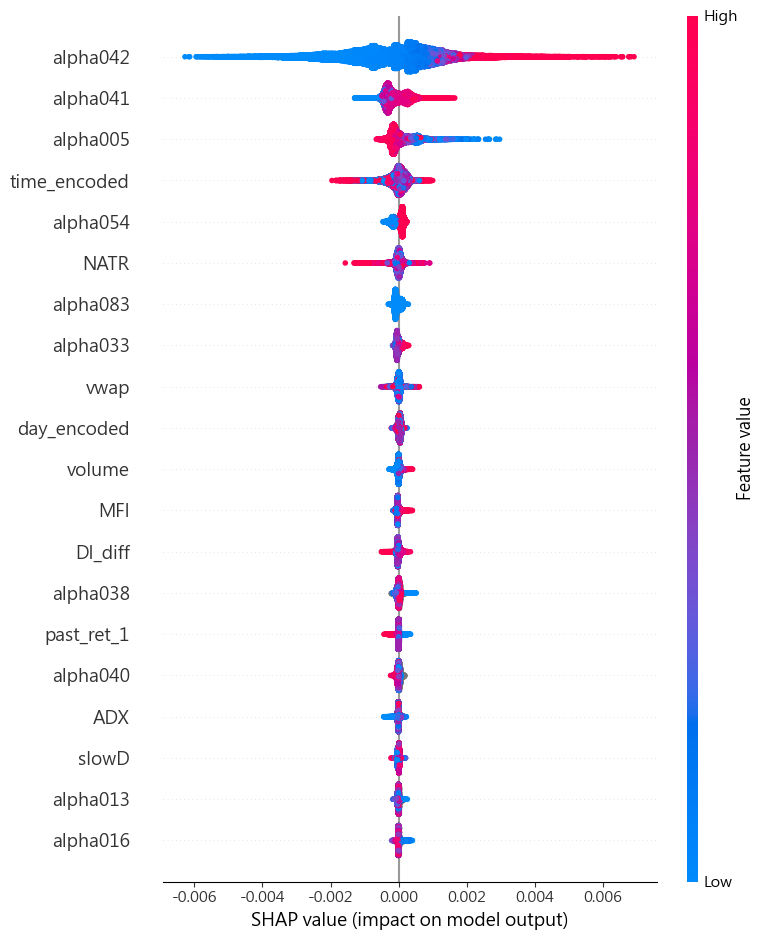

In [28]:
### SHAP fi plot (fwd_ret_10)
explainer = shap.TreeExplainer(test_model['fwd_ret_10'])
shap_values = explainer.shap_values(stocks1_test.drop(ret_col, axis=1) )
shap.summary_plot(shap_values, stocks1_test.drop(ret_col, axis=1))

### Forward Returns Forecasting

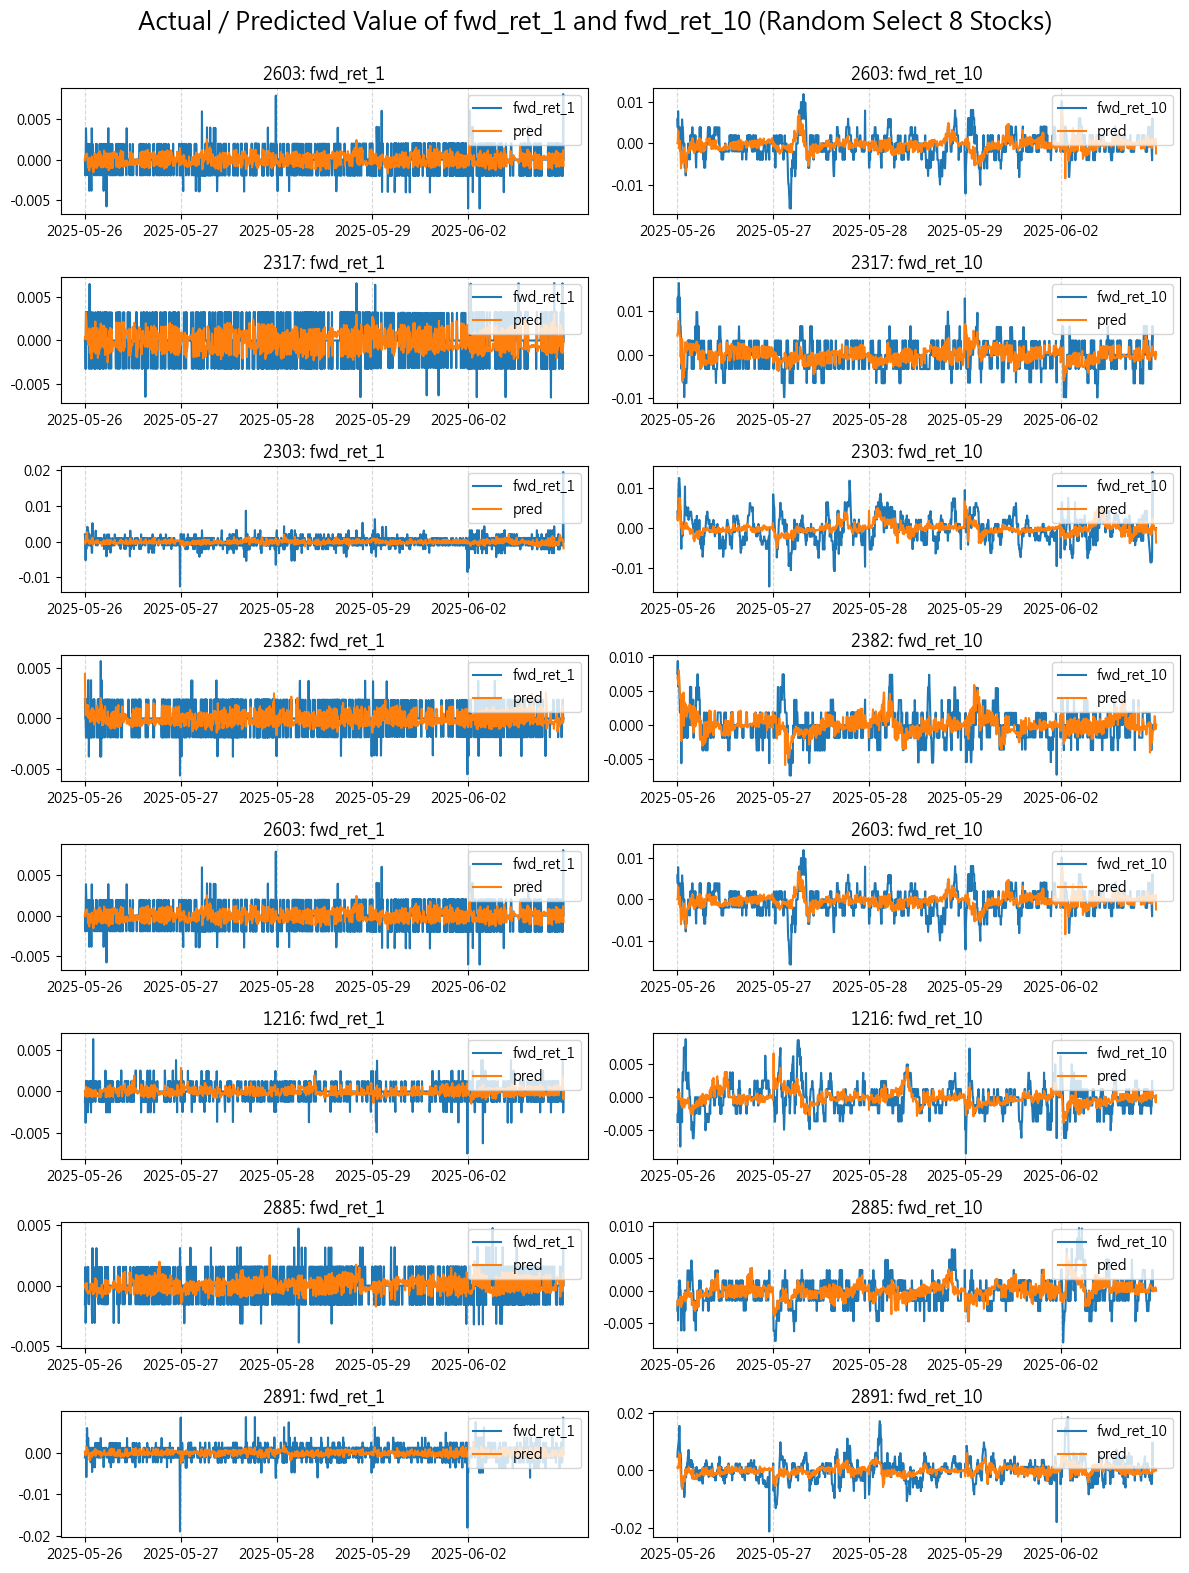

In [29]:
np.random.seed(320)
n = 8
# tickers_random = random.sample(tickers, n)
tickers_random = np.random.choice(tickers, n)
targets = ['fwd_ret_1', 'fwd_ret_10']
fig, axes = plt.subplots(nrows = n , ncols = len(targets) , figsize=(6 * len(targets), 2 * n))

for i, ticker in enumerate(tickers_random):
    for idx, target in enumerate(targets):
        row = i
        col = idx % len(targets)

        preds_ticker=test_res[target]['preds'].query(f"ticker=='{ticker}'").copy().reset_index(level=1, drop=True)
        first_of_day = preds_ticker.groupby(preds_ticker.index.date).head(1).index
        first_of_day_idxnum = preds_ticker.index.get_indexer(first_of_day)
        first_of_day_label = preds_ticker.index[first_of_day_idxnum].date
        preds_ticker.reset_index(drop=True, inplace=True)

        plott = preds_ticker.plot(title = f'{ticker}: {target}', ax = axes[row, col])
        plott.set_xticks(first_of_day_idxnum)
        plott.set_xticklabels(first_of_day_label)
        plott.legend(loc = 'upper right')
        plott.grid(True, axis='x', linestyle='--', alpha=0.5)
    
fig.suptitle(f'Actual / Predicted Value of fwd_ret_1 and fwd_ret_10 (Random Select {n} Stocks)', fontsize=18)
plt.tight_layout(rect = [0,0,1,0.98])
plt.show()


### Box Plots of Actual / Predicted forward Returns

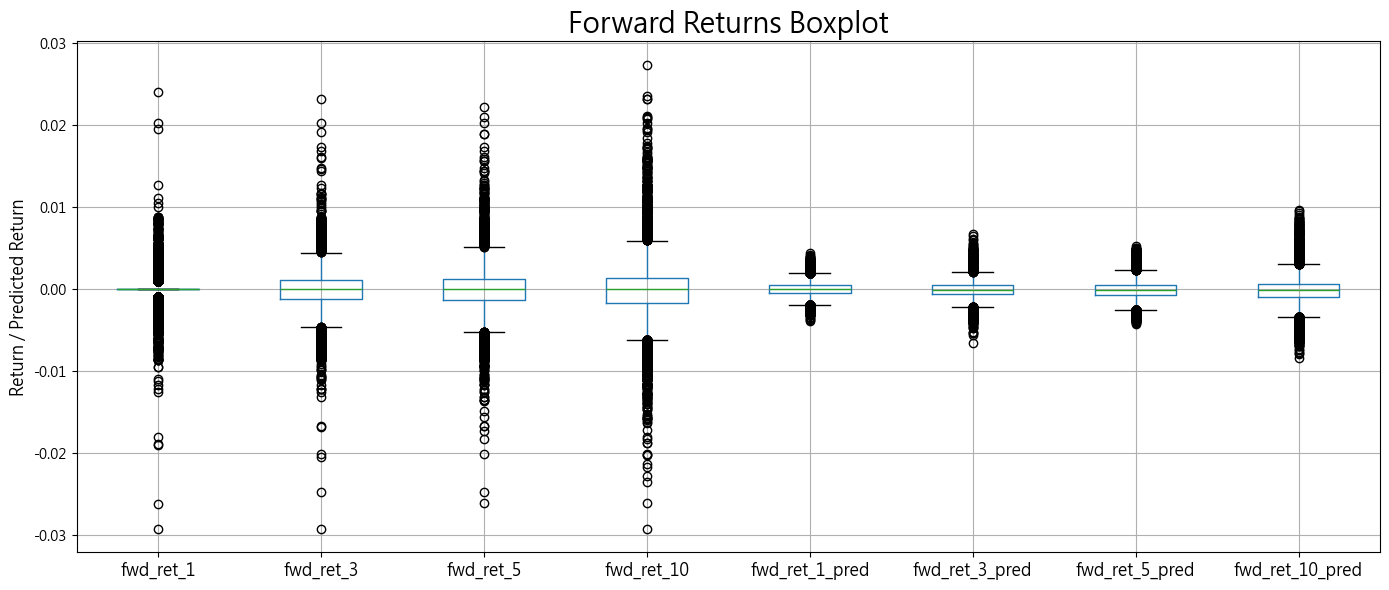

In [30]:
# reload test data
stocks1_test = get_cv(DATA=stocks1).get_test_data().copy()

# Â∞áÈ†êÊ∏¨ÁµêÊûúËàáÊ∏¨Ë©¶ÈõÜÂêà‰Ωµ
for target in ret_col:
    stocks1_test.loc[:,f'{target}_pred'] = test_res[target]['preds']['pred'].reindex(stocks1_test.index)  

ret_col2 = stocks1_test.filter(regex='fwd_ret').columns  # Êú™‰æÜÂ†±ÈÖ¨Áéá+È†êÊ∏¨ÁöÑÊú™‰æÜÂ†±ÈÖ¨Áéácolumn

# Áπ™Ë£ΩÊú™‰æÜÂ†±ÈÖ¨ÁéáËàáÂÖ∂È†êÊ∏¨ÂÄºÁöÑBox Plot
plt.figure(figsize=(14, 6))  

stocks1_test[ret_col2].boxplot()

# Ë™øÊï¥ X Ëª∏ÊñáÂ≠óËßíÂ∫¶ËàáÂ§ßÂ∞è
plt.xticks(rotation=0, fontsize=12)

# Ë™øÊï¥Ê®ôÈ°åËàáÂ∫ßÊ®ôËª∏Â≠óÈ´îÂ§ßÂ∞è
plt.title("Forward Returns Boxplot", fontsize=20)
plt.ylabel("Return / Predicted Return", fontsize=12)

plt.tight_layout()
plt.show()

## Backtesting

- Built trading strategies using both the `from_signals` and `from_order_func` methods from the `vectorbt.Portfolio` module.

- The backtesting primarily rely on the predicted future returns, with past returns and technical indicators used as supporting signals.

In [31]:
stocks1_test.head()

open    high     low   close  volume        vwap  \
date                ticker                                                      
2025-05-26 09:00:00 1216     79.9   79.90   79.70   79.70   223.0   79.766667   
                    2207    621.0  622.00  621.00  621.00    12.0  621.333333   
                    2303     47.8   48.05   47.65   48.05  3064.0   47.916667   
                    2308    374.0  374.00  371.00  372.00   116.0  372.333333   
                    2317    152.5  153.00  151.50  152.00  1782.0  152.166667   

                            alpha002  alpha003  alpha005  alpha006  ...  \
date                ticker                                          ...   
2025-05-26 09:00:00 1216         0.0       0.0 -0.729323       0.0  ...   
                    2207         0.0       0.0 -0.180451       0.0  ...   
                    2303         0.0       0.0 -0.601504       0.0  ...   
                    2308         0.0       0.0 -0.703008       0.0  ...   
                    2317         0.0       0.0 -0.033835       0.0  ...   

                                slowK      slowD      NATR        ADX  \
date                ticker                                              
2025-05-26 09:00:00 1216    44.444444  55.555556  0.151297  27.297720   
                    2207    66.666667  73.333333  0.304840  30.755895   
                    2303    26.111111  25.370370  0.257650  46.949989   
                    2308    59.523810  69.841270  0.225562  23.587404   
                    2317    56.666667  63.333333  0.460529  49.666054   

                              DI_diff      OBV  fwd_ret_1_pred  \
date                ticker                                       
2025-05-26 09:00:00 1216   -11.071725  12880.0        0.000049   
                    2207   -23.695994    318.0        0.003430   
                    2303   -52.260905  98439.0       -0.000477   
                    2308   -17.271014  15351.0        0.000558   
                    2317   -31.496645  41279.0        0.000197   

                            fwd_ret_3_pred  fwd_ret_5_pred  fwd_ret_10_pred  
date                ticker                                                   
2025-05-26 09:00:00 1216          0.001219       -0.000474    -8.804182e-07  
                    2207          0.005175        0.004640     6.929845e-03  
                    2303          0.000682        0.000963     2.780153e-03  
                    2308          0.001634        0.000459     2.471541e-03  
                    2317          0.001374        0.003249     4.400980e-03  

[5 rows x 70 columns]

In [32]:
stocks1_test.columns  

Index(['open', 'high', 'low', 'close', 'volume', 'vwap', 'alpha002',
       'alpha003', 'alpha005', 'alpha006', 'alpha007', 'alpha011', 'alpha012',
       'alpha013', 'alpha015', 'alpha016', 'alpha018', 'alpha020', 'alpha027',
       'alpha030', 'alpha033', 'alpha038', 'alpha040', 'alpha041', 'alpha042',
       'alpha044', 'alpha050', 'alpha051', 'alpha053', 'alpha054', 'alpha060',
       'alpha083', 'alpha101', 'day', 'time', 'stock_encoded', 'day_encoded',
       'time_encoded', 'close_10min', 'close_20min', 'open_10min',
       'open_20min', 'past_ret_1', 'past_ret_2', 'past_ret_3', 'past_ret_4',
       'past_ret_5', 'past_ret_6', 'past_ret_7', 'past_ret_8', 'past_ret_9',
       'past_ret_10', 'fwd_ret_1', 'fwd_ret_3', 'fwd_ret_5', 'fwd_ret_10',
       'BOP', 'CCI', 'MFI', 'STOCHRSI', 'slowK', 'slowD', 'NATR', 'ADX',
       'DI_diff', 'OBV', 'fwd_ret_1_pred', 'fwd_ret_3_pred', 'fwd_ret_5_pred',
       'fwd_ret_10_pred'],
      dtype='object')

### from_signals

#### Strategy Design

- Ë®äËôü‰æÜÊ∫êÔºö ÂÉÖ‰æùË≥¥„ÄåÈ†êÊ∏¨Êú™‰æÜÂ†±ÈÖ¨Áéá„ÄçÔºàfwd_ret_t_predÔºåÂÖ∂‰∏≠ t ÁÇ∫Êú™‰æÜ t ÂàÜÈêòÔºâ‰ΩúÁÇ∫ÈÄ≤Âá∫Â†¥‰æùÊìöÔºå‰∏ç‰ΩøÁî®ÂÖ∂‰ªñË§áÈõúË®äËôüÊàñÊäÄË°ìÊåáÊ®ô„ÄÇ

- Ë≥áÈáëÊ¨äÈáçÈÖçÁΩÆÔºö ‰ª•ÂêÑËÇ°Á•®Áï∂‰∏ãÁöÑ **VWAPÔºàÊàê‰∫§ÈáèÂä†Ê¨äÂπ≥ÂùáÂÉπÔºâ**ÈÄ≤Ë°åL1Ê≠£Ë¶èÂåñÔºå‰ΩúÁÇ∫Ë≥áÈáëÈÖçÁΩÆÊØî‰æã„ÄÇ‚Üí Ê≠§Ë®≠Ë®à‰ΩøÊúÄÁµÇ‰∏ãÂñÆËÇ°Êï∏Â§ßËá¥ÂùáÂàÜ„ÄÇ

- ÂÄâ‰ΩçË™øÊï¥ÈÇèËºØÔºö

    - ÈÄ≤Â†¥Ê¢ù‰ª∂Ôºö **fwd_ret_10_pred > 0.1%** Êàñ **fwd_ret_5_pred > 0.2%**

    - Âá∫Â†¥Ê¢ù‰ª∂Ôºö **fwd_ret_10_pred < 0.2%**

- È¢®ÊéßÊ©üÂà∂Ôºö

    - ÂÅúÊêçÈñÄÊ™ªÁÇ∫ **2%**

    - Ëã•ÈÉ®‰ΩçÂÉπÊ†ºËá™ÊúÄÈ´òÈªûÂõûËêΩË∂ÖÈÅé 2%ÔºåÂç≥Ëß∏ÁôºÂÅúÊêç

    - ‰∏çË®≠ÂÅúÂà©Ê¢ù‰ª∂ÔºåËÆìÁç≤Âà©ÊåÅÁ∫åÂª∂‰º∏

- Ë≥áÈáëËàá‰∫§ÊòìÈôêÂà∂Ôºö 

    - ÂÖ®ÈÉ®ËÇ°Á•®ÂÖ±Áî®Ë≥áÈáëÊ±†Ôºå‰∏¶**ÂÖÅË®±ÈÉ®ÂàÜ‰∏ãÂñÆ**ÔºåÊèêÈ´òË≥áÈáë‰ΩøÁî®ÊïàÁéá„ÄÇ

    - ÂÉÖÂÖÅË®±**Êï¥Êï∏ËÇ°Êï∏**‰∏ãÂñÆÔºåÂñÆÁ≠Ü‰∏ãÂñÆÊúÄÂ∞ë 1 ËÇ°ÔºåÊúÄÂ§ö 2,000 ËÇ°

    - ÂàùÂßãË≥áÈáëÔºö 1,000,000 ÂÖÉ

    - ÊâãÁ∫åË≤ªÔºöÊØèÁ≠Ü‰∫§Êòì **0.1425%**

    - ÊªëÂÉπÔºöÊØèÁ≠Ü‰∫§ÊòìÂè¶Ë®à **0.1%** ÊªëÂÉπ





#### Setting

In [33]:
# stocks1_test Â∑≤Á∂ìÊòØ MultiIndex (date, stock)Ôºåclose ÁÇ∫Êî∂Áõ§ÂÉπ
df = stocks1_test.copy()

close = df['close'].unstack()
pred5 = df['fwd_ret_5_pred'].unstack()
pred10 = df['fwd_ret_10_pred'].unstack()

# ÈÄ≤Â†¥Ë®äËôüÊ¢ù‰ª∂Ôºàbuy / sellÔºâ
buy_signal = (pred10 > 0.001)| (pred5>0.002)#| (pred3.gt(pred5).gt(pred10))# #| (pred3.gt(pred5).gt(pred10))# & (close < bb_lower)
sell_signal = (pred10 < -0.002)# | (pred10.lt(pred5).lt(pred3).lt(0))# # | (pred10.lt(pred5).lt(pred3).lt(0)) #& (close > bb_upper)

INIT_CASH = 1_000_000

# Ê¨äÈáç
# weight = (df['alpha042'].unstack() / df['close'].unstack()).transform(lambda x: x/sum(x), axis=1)

# # VWAP Ê¨äÈáç (normalized)
weight = (df['vwap'].unstack()).transform(lambda x: x/sum(x), axis=1).fillna(0)

position_amount = INIT_CASH * weight / close  # ÊØèÊ†ºËÇ°Êï∏ÈÖçÁΩÆÔºàÂ§ßËá¥ÂùáÂàÜÔºâ

# position_amount

In [34]:
# Âª∫Á´ã Portfolio
pf_signal = vbt.Portfolio.from_signals(
    close,
    entries=buy_signal,  # ËΩâÁÇ∫ numpy Áµ¶ numba
    exits=sell_signal,
    size=position_amount ,
    # size=vwap_weight,
    init_cash=INIT_CASH,
    freq='1min',
    cash_sharing=True,  # ÂïüÁî®Ë≥áÈáëÂÖ±‰∫´
    call_seq='reversed',  # Âè´ÂÉπÂ∫èÂàóÈ°ûÂûãÔºàauto-Ëá™ÂãïÊ±∫ÂÆöÔºõrandom-Èö®Ê©üÔºõdefault-Ë≤∑ÊñπÂÑ™ÂÖàÔºõreversed-Ë≥£ÊñπÂÑ™ÂÖàÔºâ
    accumulate=True,  # Â∑≤ÊúâÊåÅÂÄâÁöÑÊÉÖÊ≥Å‰∏ãÊòØÂê¶Á¥ØÁ©çÔºàFalse-Ë®äËôü‰∏çÂèØÁ¥ØÁ©çÔºåTrue-ÂèØÂä†Á¢ºÁ¥ØÁ©çÂèäÈÉ®ÂàÜÂπ≥ÂÄâÔºâ
    allow_partial=True, # ÊòØÂê¶ÂÖÅË®±ÈÉ®ÂàÜË≥áÈáë‰∏ãÂñÆ
    sl_stop=0.02,  # ÂÅúÊêçÊØî‰æãÔºàË∑åË∂ÖÈÅéÂ§öÂ∞ëÊØî‰æãÂ∞±Âπ≥ÂÄâÔºâ
    sl_trail=True,  # ÁßªÂãïÂÅúÊêçÔºàÊúÄÈ´òÈªûÂõûËêΩÂ∞±Âπ≥ÂÄâÂÅúÊêçÔºâ
    fees=0.001425,  # ÊâãÁ∫åË≤ª
    slippage=0.001,  # ÊªëÂÉπÊØî‰æãÔºàÂØ¶ÈöõÊàê‰∫§ÂÉπËàáÁêÜÊÉ≥ÈñìÁöÑÂ∑ÆÁï∞Ôºâ
    upon_opposite_entry='close',  # ÈÅáÂà∞Áõ∏Âèç‰ø°ËôüÊôÇÈóúÈñâÊåÅÂÄâ
    size_type="Amount", 
    # size_type='Percent',
    # Amount:Âõ∫ÂÆöËÇ°Êï∏ÔºõValueÔºöÊäïÂÖ•ÈáëÈ°çÔºõPercentÔºöÊäïÂÖ•ÈáëÈ°çÁöÑÊØî‰æãÔºàÈö®Á∏ΩÈ°çËÆäÂåñÔºâÔºõTargetPercent (from_orderÊâçÂèØÁî®)ÔºöËÆìÊ®ôÁöÑÁöÑÈáëÈ°çÊØî‰æãÂú®Èö®ËëóÊôÇÈñìËÆäÂåñÊôÇÂπ≥Ë°°ÂõûÁõÆÊ®ôÊØî‰æã
    min_size=1,  # ÊúÄÂ∞è‰∫§ÊòìÂñÆ‰Ωç
    max_size=2000,
    size_granularity=1,  # ‰∫§ÊòìÂñÆ‰ΩçÈñìÈöî
    direction="longonly",
    group_by=True,
    update_value=True,  # Á∏ΩË≥áÈáëÊòØÂê¶Èö®ÊôÇÊõ¥Êñ∞ÔºåÈ†êË®≠Â∞±ÊòØTrueÔºå‰ΩÜÂ∞çsize_type="value"Ê≤íÁî®ÔºàÂõ†ÁÇ∫Â∑≤‰∫ãÂÖàÊ±∫ÂÆöÊäïÂÖ•ÈáëÈ°çÔºâ
    # tp_stop=0.05,
)

# Ëã•‰ª•vwapÁï∂Ê®ôÁöÑÔºåsizeÈÅ∏ÊìávalueÔºåÂâáÊäïÂÖ•ËÇ°Êï∏ÊúÉÊòØvwap_weight * init_cash /closeÔºå‰ΩÜÂç≥‰æøÊî∂ÁõäÂ¢ûÂä†ÔºåÂàÜÈÖçÂà∞ÁöÑÈáëÈ°çÈÇÑÊòØÊúÉ‰∏ÄÊ®£
# Ëã•sizeÈÅ∏ÊìápercentÔºåÂâáÊäïÂÖ•ËÇ°Êï∏ÊúÉÊòØvwap_weight * "remain_cash" /close ÔºåÂõ†Ê≠§Ë®ÇÂñÆÊÑàÊôöËôïÁêÜÂàÜÈÖçÂà∞ÁöÑÈáëÈ°çÊÑàÂ∞ë
# BBANDSÂõ†È´òÈ†ªÊ®ôÊ∫ñÂ∑ÆËºÉ‰∏çÂáÜ‰∏çÂ§™ÈÅ©Âêà„ÄÅRSIË¶ÅÊê≠ÈÖçÊàê‰∫§Èáè‰ΩøÁî®ÊØîËºÉÈÅ©Âêà

# HFT: ‰∫§ÊòìÈ†ªÁéá‰Ωé„ÄÅ‰∫§ÊòìÈáèÂ§ß„ÄÅÂàÜÊâπÈÄ≤Âá∫Â†¥„ÄÅÂØ¨È¨ÜÊ≠¢ÁõàÊ≠¢Êêç„ÄÅÊèêÈ´òÂãùÁéá(ÊúÄÈáçË¶Å!!!)
# ÊÉ≥Ê≥ïÔºöÈôêÂà∂ÊúÄÂ∞èÊàê‰∫§Èáè/ÂÉπÔºà‰ª•Èôç‰ΩéÊ¨°Êï∏Ôºâ„ÄÅÊúÄÂ∞èÊåÅÂÄâÊôÇÈñì(ÂèØËÉΩÊúâÂ•ΩÊúâÂ£û?)„ÄÅÊÄùËÄÉÂª∂ÈÅ≤ÁöÑÈÉ®ÂàÜÔºàmaybeË∑üÊªëÂÉπÈÅ∏‰∏ÄÂÄãÂ∞±Â•ΩÔºâ
# maybeÈñãÊî∂Áõ§ÁöÑÈÄ≤Âá∫Â†¥Ê¢ù‰ª∂Ë®≠‰∏ç‰∏ÄÊ®£ÂèØ‰ª•ÂÑ™Âåñ

# ÊàëÂ∏åÊúõfrom_order_funcËÉΩÂÅöÂà∞ÁöÑÔºö
## 1. ÈñãÊî∂Áõ§Ê¢ù‰ª∂Âº∑ÂåñÔºàÈÄ≤Â†¥Ê¢ù‰ª∂ËºÉÂö¥Ê†ºÔºåÊî∂Áõ§ÂèØËÄÉÊÖÆÔºâ
## 2. Ê†πÊìöÊõ¥Â§öÊ¢ù‰ª∂Ë®≠ÂÆöÂä†Á¢º„ÄÅÂÅúÊêçÂá∫Â†¥
## 3. ÂãôÂøÖÂÅöÂà∞Èö®ÊôÇÊåâÊî∂ÁõäË™øÊï¥Á∏ΩË≥áÈáëÂèäÂêÑÊàêÂàÜËÇ°ÁöÑÊäïÂÖ•ÈáëÈ°çÔºàÊØî‰æãÔºâ
## 3-1 ÊØèÂÄãÊôÇÈñìÈªûË™øÊï¥‰∏ÄÊ¨°‰∏¶‰∏î"‰∏çË¶Å"ÂÉèsize_type='percent'ÈÇ£Ê®£ÂêåÂÄãÊôÇÈñìÈªûÂÖàËôïÁêÜËÇ°Á•®ËôüÁ¢ºÂ∞èÁöÑ‰ª•Ëá¥Ê¨äÈáçÂ§±Ë°°
## 4. Ê£ÑÁî®vwap‰ΩúÁÇ∫ÊäïË≥áÁµÑÂêàÊ¨äÈáçÔºåÈÇÑÊ≤íÊÉ≥Âà∞ÈÅ©ÂêàÁöÑÔºåmaybeÁî®close„ÄÅÁ≠âÊ¨ä„ÄÅÈ†êÊúüÂ†±ÈÖ¨ÁéáÂä†Ê¨ä

#### Table Results

In [35]:
pf_signal.stats()

Start                               2025-05-26 09:00:00
End                                 2025-06-02 13:30:00
Period                                  0 days 22:10:00
Start Value                                   1000000.0
End Value                                1068582.442404
Total Return [%]                               6.858244
Benchmark Return [%]                           -1.89655
Max Gross Exposure [%]                        99.999966
Total Fees Paid                            42219.999696
Max Drawdown [%]                               1.523718
Max Drawdown Duration                   0 days 05:08:00
Total Trades                                        808
Total Closed Trades                                 787
Total Open Trades                                    21
Open Trade PnL                              10615.91391
Win Rate [%]                                  56.797967
Best Trade [%]                                 2.109549
Worst Trade [%]                               -3

In [36]:
print(f"Alpha: {pf_signal.alpha():.3e}, \nBeta: {pf_signal.beta():.4}")
# portfolio.asset_flow().loc[portfolio.asset_flow().apply(sum, axis=1)!=0]
# pf_signal.positions.values

Alpha: 5.126e+14, 
Beta: 0.9957


In [37]:
# ÂêÑÊ™îÂÄãËÇ°‰∏ãÂñÆÊ¨°Êï∏
pf_signal.orders.records_readable.query('Side=="Buy"').groupby('Column').size()

Column
1216     58
2207     37
2303     61
2308     25
2317     69
2330     10
2345     30
2357     32
2382     56
2412    104
2454     81
2603     22
2880     34
2881     68
2882     78
2884     63
2885     49
2886     59
2891     93
2892    118
3045    106
3711     56
5880     49
6505     59
6669     43
dtype: int64

In [38]:
# ÂêÑÊ™îÂÄãËÇ°Âá∫Â†¥Ê¨°Êï∏

pf_signal.orders.records_readable.query('Side=="Sell"').groupby('Column').size()

Column
1216    38
2207    19
2303    29
2308    17
2317    36
2330     7
2345    10
2357    18
2382    30
2412    68
2454    30
2603    11
2880    24
2881    34
2882    50
2884    21
2885    10
2886    45
2891    46
2892    57
3045    82
3711    36
5880    21
6505    31
6669    17
dtype: int64

In [69]:
# Ê®°ÂûãË´ãÊ±ÇÁöÑË®ÇÂñÆÊï∏ÊìöÔºà‰∏ç‰∏ÄÂÆöÊàê‰∫§Ôºâ
# pf_signal.asset_flow()
pf_signal.orders.records_readable.sort_values(by=['Column', 'Timestamp'], ascending=True)

Order Id Column           Timestamp   Size      Price        Fees  Side
252        252   1216 2025-05-26 11:10:00   57.0    78.8788    6.406931   Buy
261        261   1216 2025-05-26 11:13:00    1.0    78.8788    0.112402   Buy
272        272   1216 2025-05-26 11:18:00  117.0    78.8788   13.151068   Buy
277        277   1216 2025-05-26 11:19:00  117.0    78.8788   13.151068   Buy
282        282   1216 2025-05-26 11:20:00  117.0    78.8788   13.151068   Buy
...        ...    ...                 ...    ...        ...         ...   ...
2041      2041   6669 2025-06-02 10:14:00    3.0  2392.3900   10.227467   Buy
2077      2077   6669 2025-06-02 10:30:00   40.0  2407.5900  137.232630  Sell
2113      2113   6669 2025-06-02 11:59:00    2.0  2392.3900    6.818312   Buy
2193      2193   6669 2025-06-02 12:35:00    6.0  2392.3900   20.454935   Buy
2209      2209   6669 2025-06-02 12:42:00    6.0  2392.3900   20.454935   Buy

[2247 rows x 7 columns]

In [70]:
# ÂØ¶ÈöõÊàê‰∫§ÁöÑË®ÇÂñÆÊï∏ÊìöÔºàentry timeË∑üexit timeÂàÜÂà•‰ª£Ë°®Ë©≤Ë®ÇÂñÆÊúÄÊó©ÂÖ•ÂÄâÁöÑÊôÇÈñì‰ª•ÂèäÊúÄÊôöÊ∏ÖÁ©∫ÂÄâ‰ΩçÁöÑÊôÇÈñìÔºâ

# pf_signal.asset_flow()
pf_signal.trades.records_readable.sort_values(by=['Column', 'Entry Timestamp'], ascending=True)

Exit Trade Id Column   Size     Entry Timestamp  Avg Entry Price  \
0                0   1216  115.0 2025-05-26 11:10:00        79.967988   
1                1   1216  115.0 2025-05-26 11:10:00        79.967988   
2                2   1216  115.0 2025-05-26 11:10:00        79.967988   
3                3   1216  115.0 2025-05-26 11:10:00        79.967988   
4                4   1216  115.0 2025-05-26 11:10:00        79.967988   
..             ...    ...    ...                 ...              ...   
803            803   6669  115.0 2025-05-29 13:30:00      2383.155969   
804            804   6669  115.0 2025-05-29 13:30:00      2383.155969   
805            805   6669   28.0 2025-05-29 13:30:00      2383.155969   
806            806   6669   40.0 2025-06-02 09:44:00      2393.391000   
807            807   6669   14.0 2025-06-02 11:59:00      2392.390000   

     Entry Fees      Exit Timestamp  Avg Exit Price   Exit Fees          PnL  \
0     13.104754 2025-05-27 10:26:00         81.5184   13.358828   151.833839   
1     13.104754 2025-05-27 10:27:00         81.5184   13.358828   151.833839   
2     13.104754 2025-05-27 10:28:00         81.5184   13.358828   151.833839   
3     13.104754 2025-05-27 10:29:00         81.5184   13.358828   151.833839   
4     13.104754 2025-05-27 10:30:00         81.5184   13.358828   151.833839   
..          ...                 ...             ...         ...          ...   
803  390.539684 2025-06-02 09:07:00       2417.5800  396.180923  3172.042959   
804  390.539684 2025-06-02 09:08:00       2427.5700  397.818034  4319.255848   
805   95.087923 2025-06-02 09:09:00       2422.5750   96.660742   911.984203   
806  136.423287 2025-06-02 10:30:00       2407.5900  137.232630   294.304083   
807   47.728181 2025-06-02 13:30:00       2410.0000    0.000000   198.811820   

       Return Direction  Status  Position Id  
0    0.016510      Long  Closed            0  
1    0.016510      Long  Closed            0  
2    0.016510      Long  Closed            0  
3    0.016510      Long  Closed            0  
4    0.016510      Long  Closed            0  
..        ...       ...     ...          ...  
803  0.011574      Long  Closed          219  
804  0.015760      Long  Closed          219  
805  0.013667      Long  Closed          219  
806  0.003074      Long  Closed          220  
807  0.005936      Long    Open          221  

[808 rows x 14 columns]

#### Figure Results

In [207]:
datetime_order = pf_signal.wrapper.index
ticker_order = pf_signal.wrapper.columns

# Â∞áÂúñÁâáÁöÑxËª∏ÈÇÑÂéüÊàêÂéüÂßãË≥áÊñôÊó•ÊúüÔºàÈùû‰∫§ÊòìÊôÇÈñì‰∏çÁïôÁôΩÔºâ
def fig_adj_xaxis(fig):
    first_of_day = [dt[0] for dt in datetime_order.groupby(datetime_order.date).values()]
    fig.update_layout(
        xaxis_type='category',
        xaxis=dict(tickmode='array',
                   tickvals=[datetime_order.get_loc(dt) for dt in first_of_day], 
                   ticktext=[dt.strftime('%Y-%m-%d') for dt in first_of_day], 
                   tickangle=0)
    )
    return fig
def fig_adj_xaxis_subplot(fig, subplot_idx):
    first_of_day = [dt[0] for dt in datetime_order.groupby(datetime_order.date).values()]

    xaxis_key = f'xaxis{subplot_idx}' if subplot_idx > 1 else 'xaxis'
    fig.update_layout({
        xaxis_key: dict(
            type='category',
            tickmode='array',
            tickvals=[datetime_order.get_loc(dt) for dt in first_of_day],
            ticktext=[dt.strftime('%Y-%m-%d') for dt in first_of_day],
            tickangle=30
        )
    })
    return fig


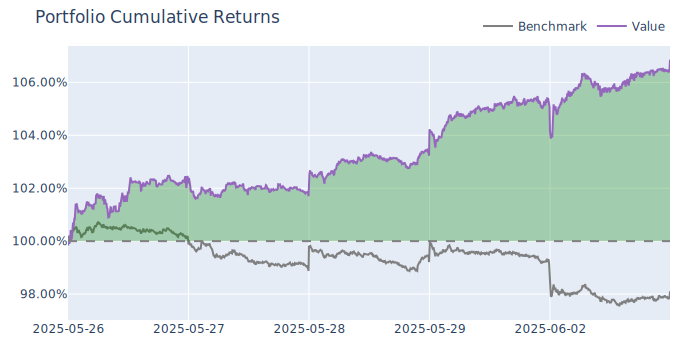

In [231]:
# import plotly.graph_objects as go
fig = pf_signal.plot_cum_returns(title='Portfolio Cumulative Returns')
# fig = go.Figure(fig)
fig.update_layout(yaxis_tickformat='.2%')
show_plotly(fig_adj_xaxis(fig))     # fig_name='signal_cum_ret'

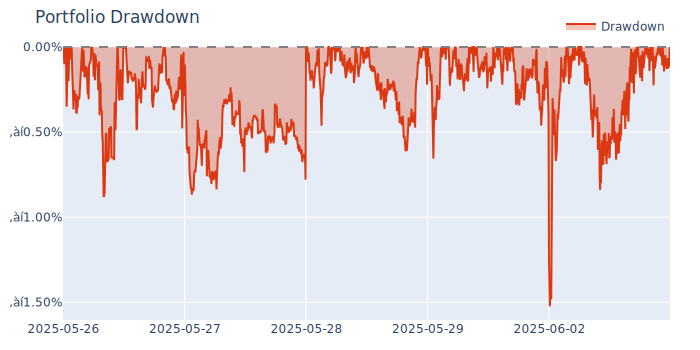

In [232]:
# ÂõûÊí§Ê∑±Â∫¶ÔºàÁõ∏Â∞çÊ≠∑Âè≤È´òÈªûË∑åÂπÖÔºâ
fig = pf_signal.plot_underwater(title='Portfolio Drawdown')
fig.update_layout(yaxis_tickformat='.2%')
show_plotly(fig_adj_xaxis(fig))     # fig_name='signal_drawdown'

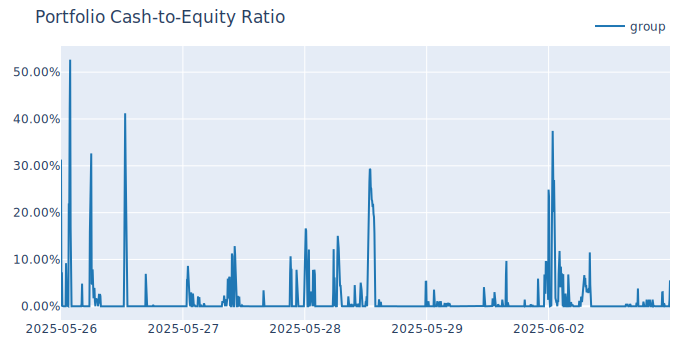

In [233]:
fig = (pf_signal.cash()/pf_signal.value()).vbt.plot(title='Portfolio Cash-to-Equity Ratio')
fig.update_layout(yaxis_tickformat='.2%')
show_plotly(fig_adj_xaxis(fig))     # fig_name='signal_cash2equity'

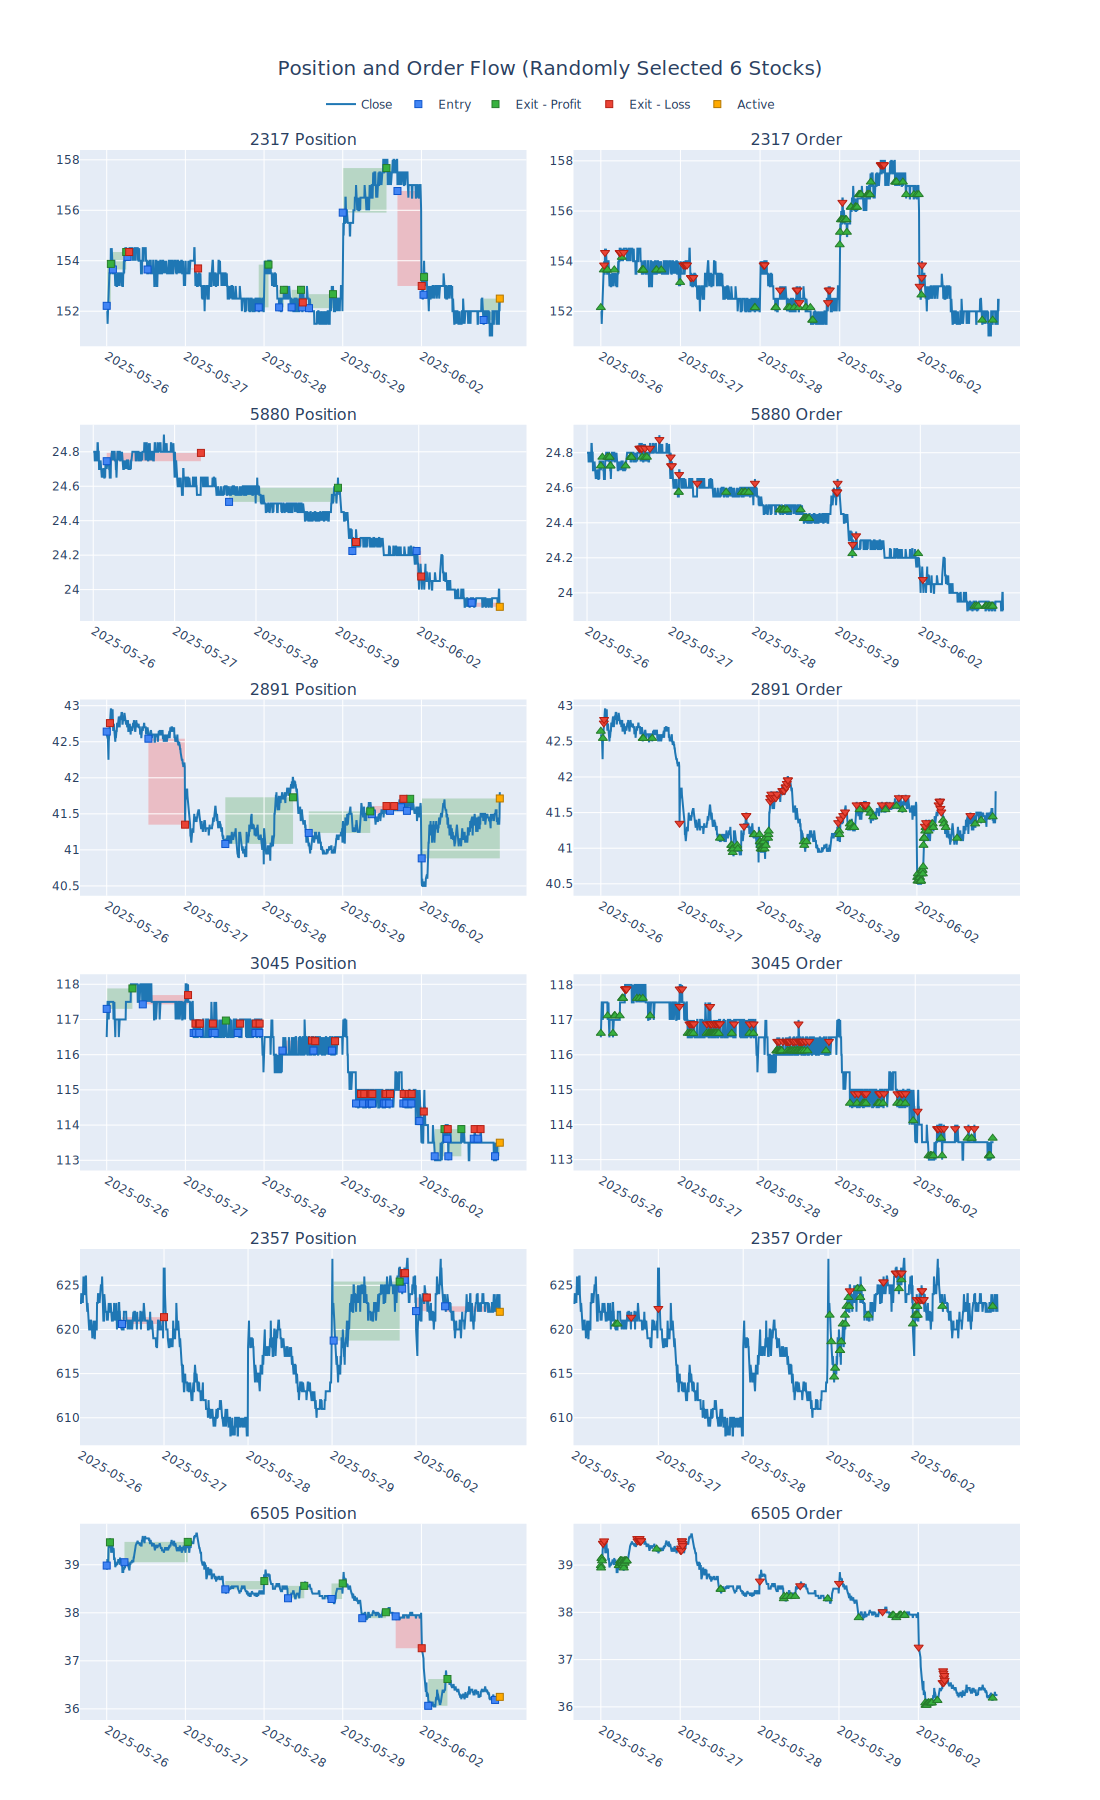

In [234]:
# ÂÄãËÇ°ÁöÑÈÉ®‰ΩçËÆäÂåñ(Position)ËàáË®ÇÂñÆÈÄ≤Âá∫ÂÄâËÆäÂåñ(Order)ÁöÑÁµêÊûúÔºàÈö®Ê©üÈÅ∏Âèñ6Ê™îÂÄãËÇ°Ôºâ
from plotly.subplots import make_subplots
np.random.seed(320)
n = 6
ticker_chosen = np.random.choice(ticker_order, n, replace=False)
fig = make_subplots(rows=n, cols=2, 
                    horizontal_spacing=0.05,   # È†êË®≠ 0.2ÔºåÊîπÂ∞èÊúÉËÆìÂ≠êÂúñÊõ¥ÂØ¨
                    vertical_spacing=0.05,     # ÊîπÂ∞èÊúÉËÆìÂ≠êÂúñÊõ¥È´ò
                    subplot_titles=sum(
                        [[f'{i} Position', f'{i} Order'] for i in ticker_chosen]
                        , [])  # sum(,[])ÊòØÊäänested list unnest
                    )

# ÊóóÊ®ôÔºöÂè™È°ØÁ§∫‰∏ÄÊ¨°Âúñ‰æã
legend_shown = False

for row, ticker in enumerate(ticker_chosen):
    for col, data_type in enumerate(['positions', 'orders']):
        
        if data_type == 'positions':
            subfig = pf_signal.positions.plot(ticker)
        else:
            subfig = pf_signal.orders.plot(ticker)

        subplot_idx = row * 2 + col + 1

        # Ë®≠ÂÆö subplot Â∞çÊáâÁöÑ xref/yref ÂêçÁ®±
        xref = f'x{subplot_idx if subplot_idx > 1 else ""}'
        yref = f'y{subplot_idx if subplot_idx > 1 else ""}'

        for trace in subfig.data:
            # Âè™‰øùÁïôÁ¨¨‰∏ÄÊ¨°Âúñ‰æãÔºåÂÖ∂È§òÈóúÊéâ
            trace.showlegend = not legend_shown
            fig.add_trace(trace, row=row+1, col=col+1)

        legend_shown = True  # ‰πãÂæåÂ∞±‰∏çÂÜçÈ°ØÁ§∫Âúñ‰æã        

        # Âä†ÂÖ•Ë©≤Â≠êÂúñÁöÑÊâÄÊúâ shapeÔºàÂ¶ÇÊûúÊúâÔºâ
        if 'shapes' in subfig.layout:
            for shape in subfig.layout.shapes:
                # shape = shape.copy()  # ÈÅøÂÖç‰øÆÊîπÂéüÁâ©‰ª∂
                shape['xref'] = xref
                shape['yref'] = yref
                fig.add_shape(shape, row=row+1, col=col+1)    
        
        fig_adj_xaxis_subplot(fig, subplot_idx)

# Ë™øÊï¥ legend Âà∞ÂúñÁöÑ‰∏äÊñπ
fig.update_layout(
    title = dict(
        text=f"Position and Order Flow (Randomly Selected {n} Stocks)",
        x=0.5,  # Ê∞¥Âπ≥ÁΩÆ‰∏≠
        xanchor='center',
        font=dict(size=20)
    ),
    margin = dict(t=150),
    height=300*n,
    width=1100,
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="center",
        x=0.5
    )
)

show_plotly(fig)    # fig_name='signal_pos_ord_flow'


### from_order_func

#### Strategy Design

- ‰∏ªË¶ÅÁõÆÊ®ôÔºö
    - ÂΩåË£ú from_signals ÁÑ°Ê≥ïÊîØÊè¥Âä†Á¢ºÔºèÊ∏õÁ¢ºÁöÑÈôêÂà∂Ôºå**ÊòéÁ¢∫Ë®≠Ë®àÂá∫ÂÄâ‰ΩçË™øÊï¥ÔºàÂä†Á¢º„ÄÅÊ∏õÁ¢ºÔºâ„ÄÅÂÅúÂà©ËàáÂÅúÊêçÁöÑÈÇèËºØ**„ÄÇ

- Ê¨°Ë¶ÅÁõÆÊ®ôÔºö
    - ÊèêÂçáÂãùÁéá„ÄÅÁ∏ΩÂ†±ÈÖ¨ÁéáËàá Sharpe ratioÔºåÂêåÊôÇÊ∏õÂ∞ë‰∏çÂøÖË¶ÅÁöÑÈÄ≤Âá∫Â†¥Ôºå‰ª•Èôç‰ΩéÊâãÁ∫åË≤ªÊàêÊú¨„ÄÇ

- Ë≥áÈáëÊ¨äÈáçÈÖçÁΩÆÔºö
    
    - ‰ª•ÂêÑËÇ°Á•®Áï∂‰∏ãÁöÑ **VWAP √ó Alpha42** ÂÄºÈÄ≤Ë°å L1 Ê≠£Ë¶èÂåñÔºå‰ΩúÁÇ∫Ë≥áÈáëÈÖçÁΩÆÊØî‰æã„ÄÇ

    - Ë®ªÔºöAlpha42 ÊòØÂü∫Êñº LightGBM Ê®°ÂûãÈ†êÊ∏¨Êú™‰æÜÂ†±ÈÖ¨Áéá‰∏≠ÔºåÊúÄÈáçË¶ÅÁöÑÂõ†Â≠ê„ÄÇ

- ÂÄâ‰ΩçË™øÊï¥ÈÇèËºØÔºö

    - ÈÄ≤Â†¥Ë®äËôüÔºàÁÑ°ÊåÅÂÄâÊôÇÔºâÔºö
        - **fwd_ret_10_pred > 0.1%**
        - **fwd_ret_5_pred > 0.2%** 
        - ‰ªª‰∏ÄÊªøË∂≥ ‚Üí Âª∫ÂÄâ 80%ÔºõÂÖ©ËÄÖÁöÜÊªøË∂≥ ‚Üí Âª∫ÂÄâ 120%ÔºàÂÖÅË®±Ë∂ÖÈÅé 100% ‰ª•ÂÖÖÂàÜÂà©Áî®Ë≥áÈáëÔºâ

    - Âä†Á¢ºË®äËôüÔºö
        - Ë®äËôü1Ôºö
            - **fwd_ret_10_pred > 0.05%** 
            - **ÈÅéÂéª30ÂàÜÈêòÂ†±ÈÖ¨Áéá > -1%**
            - ÂÖ®ÈÉ®ÊªøË∂≥ ‚Üí Â¢ûÂÄâ 20%

        - Ë®äËôü2Ôºö
            - **fwd_ret_10_pred > 0.08%** 
            - **fwd_ret_5_pred > 0.2%** 
            - ‰ªª‰∏ÄÊªøË∂≥ ‚Üí Â¢ûÂÄâ 20%ÔºõÂÖ©ËÄÖÁöÜÊªøË∂≥ ‚Üí Â¢ûÂÄâ 50%

    - ÂÅúÊêçË®äËôüÔºö
        - **Áï∂ÂâçÊåÅÂÄâÊ∑®ÊêçÁõäÔºàÊâ£ÊàêÊú¨ÂæåÂ†±ÈÖ¨Ôºâ < -2%**
        - **ÈÅéÂéª5ÂàÜÈêòÂ†±ÈÖ¨ < -1.5%**
        - **ÈÅéÂéª10ÂàÜÈêòÂ†±ÈÖ¨ < -2%**
        - **ÈÅéÂéª30ÂàÜÈêòÂ†±ÈÖ¨ < -4%**
        - **NATRÔºàÊ≠£ÂâáÂåñÂπ≥ÂùáÁúüÂØ¶Ê≥¢ÂãïÔºâ> 0.25**
        - **Áï∂ÂâçÊî∂Áõ§ÂÉπ / EMA10Ôºà10ÂàÜÈêòÊåáÊï∏Âπ≥ÊªëÁßªÂãïÂπ≥ÂùáÔºâ‚àà (0.98, 1.01)**
        - ÊªøË∂≥ 3-4 È†Ö ‚Üí Ê∏õÂÄâ 40%Ôºõ 5-6 È†Ö ‚Üí Ê∏õÂÄâ 60%

    - ÂÅúÂà©Ë®äËôüÔºö
        - **Áï∂ÂâçÊåÅÂÄâÊ∑®ÊêçÁõä > 0.5%**  ‚Üí  Ê∏õÂÄâ30%
        - **Áï∂ÂâçÊåÅÂÄâÊ∑®ÊêçÁõä > 1.5%**  ‚Üí  Ê∏õÂÄâ80%

    - ÂÖ®ÈÉ®Âá∫Â†¥Ë®äËôüÔºö
        - **ÈÅéÂéª5ÂàÜÈêòÂ†±ÈÖ¨ < -0.15%**
        - **ÈÅéÂéª10ÂàÜÈêòÂ†±ÈÖ¨ < -0.2%**
        - **Áï∂ÂâçÊåÅÂÄâÂ∑≤ÂõûÊú¨**
        - **Ë∑ùÈõ¢È¶ñÊ¨°Âª∫ÂÄâÔºàÁï∂ÂâçÊåÅÂÄâÊúÄÊó©ÂÖ•Â†¥ÔºâÊôÇÈñìË∂ÖÈÅé60ÂàÜÈêò**
        - Ë∑ùÈõ¢È¶ñÊ¨°Âª∫ÂÄâÂ∑≤Ë∂ÖÈÅé30ÂàÜÈêòÊôÇÔºå‰∏îÊªøË∂≥‰ªª3È†Ö‰ª•‰∏ä ‚Üí ÂÖ®ÈÉ®Âπ≥ÂÄâ

- Ë≥áÈáëËàá‰∫§ÊòìÈôêÂà∂Ôºö 

    - ÂÖ®ÈÉ®ËÇ°Á•®ÂÖ±Áî®Ë≥áÈáëÊ±†Ôºå‰∏¶**ÂÖÅË®±ÈÉ®ÂàÜ‰∏ãÂñÆ**ÔºåÊèêÈ´òË≥áÈáë‰ΩøÁî®ÊïàÁéá„ÄÇ

    - ÂÉÖÂÖÅË®±**Êï¥Êï∏ËÇ°Êï∏**‰∏ãÂñÆÔºåÂñÆÁ≠Ü‰∏ãÂñÆÊúÄÂ∞ë 1 ËÇ°ÔºåÊúÄÂ§ö 2,000 ËÇ°

    - ÂàùÂßãË≥áÈáëÔºö 1,000,000 ÂÖÉ

    - ÊâãÁ∫åË≤ªÔºöÊØèÁ≠Ü‰∫§Êòì **0.1425%**

    - ÊªëÂÉπÔºöÊØèÁ≠Ü‰∫§ÊòìÂè¶Ë®à **0.1%** ÊªëÂÉπ

#### Setting

In [235]:
# plt.figure(figsize=(18,6))
# i=20
# p1=stocks1_test.xs(stocks1_test['open'].unstack().columns[i], level='ticker').reset_index(drop=True)[['close']].plot(kind="line", ax=plt.gca())
# p2=stocks1_test['close'].unstack().apply(lambda x: ta.EMA(x, timeperiod=10), axis=0).iloc[:,i].reset_index(drop=True).plot(ax=plt.gca())
# p3=stocks1_test['close'].unstack().apply(lambda x: ta.EMA(x, timeperiod=30), axis=0).iloc[:,i].reset_index(drop=True).plot(ax=plt.gca())
# p4=(vbt.RSI.run(stocks1_test['close'].unstack().reset_index(drop=True), window=30).rsi.iloc[:,0]).plot(secondary_y=True, ax=plt.gca())
# p5=(vbt.MA.run(close, window=10).ma.iloc[:,i]).plot(secondary_y=True, ax=plt.gca())
# p6=(vbt.MA.run(close, window=60).ma.iloc[:,i]).plot(secondary_y=True, ax=plt.gca())
# p7=(vbt.BBANDS.run(stocks1_test['close'].unstack().reset_index(drop=True), window=15).lower.iloc[:,i]).plot(secondary_y=True, ax=plt.gca())
# p8=(vbt.BBANDS.run(stocks1_test['close'].unstack().reset_index(drop=True), window=60).upper.iloc[:,i]).plot(secondary_y=True, ax=plt.gca())
# p9=stocks1_test['NATR'].unstack().reset_index(drop=True).iloc[:,i].plot(secondary_y=True, ax=plt.gca())
# plt.show()

In [236]:
import numba
from numba import njit
from vectorbt.portfolio import nb as portfolio_nb
from vectorbt.portfolio.enums import SizeType, Direction

In [237]:
@njit
def order_func_nb(c, # contextÔºåÂèØÁî®Â±¨ÊÄßË¶ÅÁúãgithub enums.OrderContext https://github.com/polakowo/vectorbt/blob/master/vectorbt/portfolio/enums.py
                  pred1_, pred3_, pred5_, pred10_, pastret5_, pastret10_, pastret30_, weight_, natr_, cummax_close, ema10_,
                  SIZE_TYPE, DIRECTION, FEES, FIXED_FEES, SLIPPAGE, 
                  MIN_SIZE, MAX_SIZE, MAX_ENTRY_AMOUNT_RATIO, MAX_EXIT_AMOUNT_RATIO):

    # price = close_[c.i, c.col]
    price = c.close[c.i, c.col]
    # cummax_price = cummax_close[c.i, c.col]
    pastret5 = pastret5_[c.i, c.col]
    pastret10 = pastret10_[c.i, c.col]
    pastret30 = pastret30_[c.i, c.col]
    pred5 = pred5_[c.i, c.col]
    pred10 = pred10_[c.i, c.col]
    w = weight_[c.i, c.col]
    natr = natr_[c.i, c.col]
    ema10 = ema10_[c.i, c.col]

    # c.value_now: ÁõÆÂâçÂÉπÂÄº
    # c.cash_now: ÁõÆÂâçÁèæÈáë
    # c.position_now: ÁõÆÂâçÊåÅÊúâÈÉ®‰Ωç
    # c.return_now: ÁõÆÂâçÊï¥ÂÄãÁµÑÂêàÁöÑÊî∂Áõä
    # c.pos_record_now Ââç‰∏ÄÁ≠ÜÂÆåÊï¥ÈÄ≤Âá∫Â†¥Á¥ÄÈåÑ 
    # (0: position_id, 1: col, 2: size, 3: entry_time_idx, 4: entry_price, 5: entry_fees, 
    # 6: exit_time_idx, 7: exit_price, 8:exit_fees, 9: pnl, 10: return, 11: direction, 12: status, 13: position id Ë©≤Ê™îÁ¨¨ÂπæÁ≠ÜË®ÇÂñÆ)
    # (direction, status): (0,0):ÊåÅË≤∑ÂÄâÊú™Âπ≥Ôºå(0,1):ÊåÅË≤∑ÂÄâÂ∑≤Âπ≥Ôºå(1,0):ÊåÅË≥£ÂÄâÊú™Âπ≥Ôºå(1,1):ÊåÅË≥£ÂÄâÂ∑≤Âπ≥

    # c.last_oidx[c.col] Ââç‰∏ÄÁ≠Ü‰∫§Êòìid
    # c.last_val_price[c.col] # ‰∏äÊ¨°Âü∑Ë°åÂÉπÊ†ºÔºàË≤∑ÂÖ•Ë≥£Âá∫ÂÉπÔºâ
    # c.order_records[c.last_oidx[c.col]] Ââç‰∏ÄÁ≠Ü‰∫§ÊòìÁ¥ÄÈåÑ 
    # (0: ‰∫§Êòìid, 1: col, 2: time_idx, 3: size, 4: price(Âê´ÊªëÂÉπ), 5: Á∏ΩË≤ªÁî®, 6: Ë≤∑ÂÖ•0ÈÇÑÊòØË≥£Âá∫1)

    curr_pos = c.position_now  # ÁõÆÂâçÊåÅÂÄâÊï∏
    curr_pos_cost = c.last_val_price[c.col] * (1 + FEES + FIXED_FEES)   # Ââç‰∏ÄÊ¨°ÂÖ•Â†¥ÁöÑÊØèËÇ°ÊàêÊú¨
    curr_pos_ret = price / curr_pos_cost - 1
    # curr_ret_from_max = price / cummax_price - 1 # ÂÉπÊ†ºËá™È´òÈªûÂõûËêΩÊØî‰æã
    last_entry_time = c.pos_record_now[3]  # Ââç‰∏ÄÊ¨°ÈÄ≤Â†¥ÊôÇÈñìÔºàËã•Accumulate=FÊàñË®≠ÂÆöÂè™ÊúâÁï∂curr_pos == 0ÊâçÂÖ•Â†¥ÔºåÂâáÂÖ©Ê¨°‰∫§Êòì‰πãÊñπÂêëÂøÖÁõ∏ÂèçÔºâ
    last_exit_time = c.pos_record_now[6]   # Ââç‰∏ÄÊ¨°Âá∫Â†¥ÊôÇÈñì
    time_from_last_entry = c.i - last_entry_time
    time_from_last_exit = c.i - last_exit_time
    

    size = 0  # Êú™ÊªøË∂≥‰ª•‰∏ãÂÄâ‰ΩçË™øÊï¥ÁöÑÊ¢ù‰ª∂Âç≥‰∏çÈÄ≤Ë°åÊìç‰Ωú

    # ###### Ê≠§ÂçÄ‰ª•‰∏ãÁÇ∫‰ªøfrom_signalsÁöÑÁ≠ñÁï•ÈÇèËºØ ######
    # exit_signal = (pred10<-0.002) + (curr_pos_ret < -0.02) + (0.98 < price /ema10 < 1.01)
    # if curr_pos > 0:
    #     if exit_signal >= 2: # ÊªøË∂≥Ë®äËôü‰ªª2ÂÄã‰ª•‰∏ä
    #         size = -curr_pos
    
    # if (pred10>0.001) or (pred5>0.002):
    #         size = np.round(c.cash_now * w / price)
    # ###### Ê≠§ÂçÄ‰ª•‰∏äÁÇ∫from_signalsÁöÑÁ≠ñÁï•ÈÇèËºØ ######     


    # #### Âá∫Â†¥ÈÇèËºØ #### (ÂÖàÂá∫Â†¥ÂÜçÂÖ•Â†¥)
    if curr_pos > 0:

        sl_signal = (curr_pos_ret < -0.02) + (pastret5 < -0.015) + (pastret10 < -0.02) + (pastret30 < -0.04) + (natr > 0.25) + (0.98 < price /ema10 < 1.01)
        tp_signal1 = (curr_pos_ret > (0.005 + FEES + SLIPPAGE))  # Êâ£Èô§ÊàêÊú¨Ë∂ÖÈÅé1%Â†±ÈÖ¨
        tp_signal2 = (curr_pos_ret > (0.015 + FEES + SLIPPAGE))
        exit_signal = ( (pred5 < -0.0015) +(pred10 < -0.002) + 
                       (curr_pos_ret > (FEES + SLIPPAGE)) +  # Â∑≤ÂõûÊú¨
                        (time_from_last_entry > 60) )  # Ëá≥Â∞ëÊåÅÂÄâ60ÂàÜÈêò
        
        # ÂÅúÊêçÔºöÊªøË∂≥ÂÅúÊêçË®äËôü(sl_signal)‰ªª5‰ª∂‰ª•‰∏äÔºåÂπ≥ÂÄâ60%Ôºõ3~4‰ª∂ÔºåÂπ≥ÂÄâ40%
        if sl_signal >= 5:
            size = -np.round(curr_pos * 0.6)

        elif sl_signal >= 3: 
            size = -np.round(curr_pos * 0.4)

        # ÂÅúÂà©ÔºöÊâ£Èô§ÊàêÊú¨Ë∂ÖÈÅé1.5%Â†±ÈÖ¨(tp_signal2)ÔºåÂπ≥ÂÄâ80%ÔºåË∂ÖÈÅé1%Â†±ÈÖ¨(tp_signal1)ÔºåÂπ≥ÂÄâ30%  
        elif tp_signal2:
            size = -np.round(curr_pos * 0.8)

        elif tp_signal1:  
            size = -np.round(curr_pos * 0.3)    
        
        # ÂÖ®ÈÉ®Âá∫ÂÄâÔºöËá≥Â∞ëÊåÅÂÄâ30ÂàÜÈêò‰∏îÊªøË∂≥Âá∫ÂÄâË®äËôü(exit_signal)‰ªª3‰ª∂‰ª•‰∏äÔºåÂÖ®ÈÉ®Âπ≥ÂÄâ
        elif (time_from_last_entry > 30) and exit_signal >= 3:  
            size = -curr_pos
        
    # Ëá™Ë®ÇÂá∫Â†¥‰∫§ÊòìËÇ°Êï∏‰∏äÈôêÔºà‰∏äÈôêÔºöÁï∂ÂâçË≥áÈáë*Ëá™Ë®ÇË≥áÈáë‰∏äÈôêratio/Êî∂Áõ§ÂÉπÔºâ
    size = max(size, -(c.value_now * MAX_EXIT_AMOUNT_RATIO / price) )  

    # #### ÈÄ≤Â†¥ÈÇèËºØ ####

    add_pos = np.round(c.cash_now * w / price)   # ÈÄ≤Â†¥ÂÄâ‰ΩçÔºàËÇ°Êï∏ÔºåÂèñÊï¥ÔºâÔºöÊØèÊ¨°ÈÄ≤Â†¥ÂâçÈÉΩÊõ¥Êñ∞ÁèæÊúâË≥áÈáë(c.cash_now)ÂèäÊ¨äÈáç„ÄÅÊî∂Áõ§ÂÉπ
    entry_signal = (pred10 > 0.001) + (pred5 > 0.002)  # ÈÄ≤Â†¥Ê¢ù‰ª∂
    bonus_signal1 = (pred10 > 0.0005) + (pastret30 >= -0.01) 
    bonus_signal2 = (pred10 > 0.0008) + (pred5 > 0.0012)

    # ÈÄ≤Â†¥ÔºàÊ≠§ÊôÇÈñìÈªû‰πãÂâçÊú™ÊúâÂÄâ‰ΩçÔºâÔºöÊªøË∂≥ÊâÄÊúâÈÄ≤Â†¥Ë®äËôü(entry signal)ÔºåÂÖ•ÂÄâ120%ÔºàÁÇ∫‰ΩøË≥áÈáëÂÖÖÂàÜÂà©Áî®Âõ†Ê≠§Ë∂ÖÈÅé100%ÔºâÔºåÂè™ÊªøË∂≥ÂÖ∂‰∏≠1‰ª∂ÔºåÂÖ•ÂÄâ80%
    if curr_pos == 0:
        if entry_signal == 2:  
            size = np.round(add_pos * 1.2)  

        elif entry_signal==1:
            size = np.round(add_pos * 0.8)

    # Âä†Á¢ºÊ¢ù‰ª∂1: ÊªøË∂≥Âä†Á¢ºË®äËôü1(bonus_signal1)ÂÖ®ÈÉ®Á¨¶ÂêàÔºåÂ¢ûÂÄâ20%
    elif bonus_signal1 == 2:   
        size = np.round(add_pos * 0.2)

    # Âä†Á¢ºÊ¢ù‰ª∂2: ÊªøË∂≥Âä†Á¢ºË®äËôü2(bonus_signal2)ÂÖ®ÈÉ®Á¨¶ÂêàÔºåÂ¢ûÂÄâ50%ÔºåÂè™ÊªøË∂≥1‰ª∂ÔºåÂ¢ûÂÄâ20%
    elif bonus_signal2 == 2:
        size = np.round(add_pos * 0.5)
    
    elif bonus_signal2 == 1:
        size = np.round(add_pos * 0.2)

    # Ëá™Ë®ÇÈÄ≤Â†¥‰∫§ÊòìËÇ°Êï∏‰∏äÈôêÔºà‰∏äÈôêÔºöÁï∂ÂâçË≥áÈáë*Ëá™Ë®ÇË≥áÈáë‰∏äÈôêratio/Êî∂Áõ§ÂÉπÔºâ
    size = min(size, (c.value_now * MAX_ENTRY_AMOUNT_RATIO / price))  

    
    return portfolio_nb.order_nb(
        size=size,
        price=price,
        size_type=SIZE_TYPE, # Amount:Âõ∫ÂÆöËÇ°Êï∏ÔºõValueÔºöÊäïÂÖ•ÈáëÈ°çÔºõPercentÔºöÊäïÂÖ•ÈáëÈ°çÁöÑÊØî‰æãÔºàÈö®Á∏ΩÈ°çËÆäÂåñÔºâÔºõTargetPercentÔºöËÆìÊ®ôÁöÑÁöÑÈáëÈ°çÊØî‰æãÂú®Èö®ËëóÊôÇÈñìËÆäÂåñÊôÇÂπ≥Ë°°ÂõûÁõÆÊ®ôÊØî‰æã
        direction=DIRECTION, 
        fees=FEES,
        fixed_fees=FIXED_FEES,
        slippage=SLIPPAGE,
        min_size=MIN_SIZE,
        size_granularity=1,  # ÂñÆ‰ΩçÁÇ∫1ËÇ°
        max_size=MAX_SIZE,   # ÈôêÂà∂ÊØèÂÄãÊôÇÈñìÈªûÊØèÊîØÂÄãËÇ°ÁöÑ‰∫§ÊòìËÇ°Êï∏‰∏äÈôêÔºàÈÄ≤Âá∫Â†¥ÁöÜÈôêÂà∂Ôºâ
        reject_prob=0.0,
        allow_partial=True,  # ÊòØÂê¶ÂÖÅË®±ÈÉ®ÂàÜË≥áÈáëÊäïÂÖ•ÔºàÁï∂Ë≥áÈáë‰∏çË∂≥ÊôÇÔºâ
        raise_reject=False,  # Áï∞Â∏∏ÊôÇÊòØÂê¶ÈúÄË¶Å‰∏≠Ê≠¢
        log=True
    )


In [238]:
df = stocks1_test.copy()

# open = df['open'].unstack().values
close = df['close'].unstack().values
cummax_close = df['close'].unstack().cummax().values
# vwap = df['vwap'].unstack().values
# volume = df['volume'].unstack().values
pastret5 = df['past_ret_5'].unstack().values
pastret10 = df['past_ret_10'].unstack().values
pastret30 = df['close'].unstack().transform(lambda x: x.pct_change(periods=30)).values
pred1 = df['fwd_ret_1_pred'].unstack().values
pred3 = df['fwd_ret_3_pred'].unstack().values
pred5 = df['fwd_ret_5_pred'].unstack().values
pred10 = df['fwd_ret_10_pred'].unstack().values
natr = df['NATR'].unstack().values
ema10 = df['close'].unstack().apply(lambda x: ta.EMA(x, timeperiod=10), axis=0).values


# Ê¨äÈáçË®≠Ë®àÔºàÂ¶ÇÁî®È†êÊ∏¨ÂÄºÂä†Ê¨äÔºâ
# rk_alpha042 = df['alpha042'].groupby('date').rank()
# rk_alpha041 = df['alpha041'].groupby('date').rank()
# minmax_alpha041 = df['alpha041'].unstack().apply(lambda x: (x-min(x))/(max(x)-min(x)), axis=1)
# weight = (( df['alpha042'].unstack() * minmax_alpha041) / df['close'].unstack()).apply(lambda x: x/sum(x), axis=1).values
weight = (df['alpha042'].unstack() * df['vwap'].unstack()).transform(lambda x: x/sum(x), axis=1).values

# weight = (df['vwap'].unstack()).transform(lambda x: x/sum(x), axis=1).values


In [239]:
def simu_vbt_from_order_func(SIZE_TYPE=SizeType.Amount, DIRECTION=Direction.LongOnly, INIT_CASH=1_000_000,
                             FEES=0.001425, FIXED_FEES=0, SLIPPAGE=0.001, 
                             MIN_SIZE=1, MAX_SIZE=np.inf, MAX_ENTRY_AMOUNT_RATIO=1, MAX_EXIT_AMOUNT_RATIO=1):
    
    return vbt.Portfolio.from_order_func(
        close,
        order_func_nb,
        pred1, pred3, pred5, pred10, pastret5, pastret10, pastret30, weight, natr, cummax_close, ema10, # *args for order_func_nb
        SIZE_TYPE, DIRECTION, FEES, FIXED_FEES, SLIPPAGE, 
        MIN_SIZE, MAX_SIZE, MAX_ENTRY_AMOUNT_RATIO, MAX_EXIT_AMOUNT_RATIO,
        init_cash=INIT_CASH,
        cash_sharing=True,
        update_value=True,
        group_by=True,  # ÊØèÂÄãÊôÇÈñìÈªûË¶ñÁÇ∫Âêå‰∏ÄÁµÑ
        freq='1min'
    )

In [240]:
pf_orderfnb = simu_vbt_from_order_func(MAX_SIZE=2000, MAX_ENTRY_AMOUNT_RATIO=0.15, MAX_EXIT_AMOUNT_RATIO=0.15) # ÂñÆÊ¨°ÈÄ≤Âá∫Â†¥Ë≥áÈáëÊµÅÂãï‰∏çÂæóË∂ÖÈÅéÁ∏ΩË≥áÈáë15%

#### Table Results

In [241]:
pf_orderfnb.stats()

Start                                                 0
End                                                1329
Period                                  0 days 22:10:00
Start Value                                   1000000.0
End Value                                1095692.610705
Total Return [%]                               9.569261
Benchmark Return [%]                           -1.89655
Max Gross Exposure [%]                        99.987445
Total Fees Paid                            38004.735395
Max Drawdown [%]                               1.540256
Max Drawdown Duration                   0 days 02:36:00
Total Trades                                        278
Total Closed Trades                                 256
Total Open Trades                                    22
Open Trade PnL                              2127.118025
Win Rate [%]                                  63.671875
Best Trade [%]                                 2.788311
Worst Trade [%]                               -4

In [242]:
print(f"Alpha: {pf_orderfnb.alpha():.3e}, \nBeta: {pf_orderfnb.beta():.3}")

Alpha: 3.911e+19, 
Beta: 1.17


In [243]:
pf_orderfnb_orders = pf_orderfnb.orders.records_readable
# Â∞áÊôÇÈñìËàáËÇ°Á•®ÁöÑencodingËΩâÊàêÁúüÂØ¶ÂÄº
pf_orderfnb_orders['Timestamp'] = datetime_order[pf_orderfnb_orders['Timestamp']]
pf_orderfnb_orders['Column'] = ticker_order[pf_orderfnb_orders['Column']]

In [244]:
# ÂêÑÊ™îÂÄãËÇ°‰∏ãÂñÆÊ¨°Êï∏
pf_orderfnb_orders.query('Side=="Buy"').groupby('Column').size()

Column
1216    178
2207    225
2303    161
2308    177
2317    265
2330     83
2345    156
2357    215
2382    201
2412    317
2454    297
2603    183
2880    174
2881    153
2882    267
2884    225
2885    225
2886    325
2891    249
2892    352
3045    331
3711    241
5880    190
6505    155
6669    223
dtype: int64

In [245]:
# ÂêÑÊ™îÂÄãËÇ°Âá∫Â†¥Ê¨°Êï∏
pf_orderfnb_orders.query('Side=="Sell"').groupby('Column').size()

Column
1216     5
2207     9
2303     7
2308     8
2317     9
2330     8
2345     8
2357    10
2382     8
2412    11
2454    27
2603     8
2880     3
2881     6
2882    10
2884     3
2885     5
2886     6
2891    11
2892     9
3045    25
3711    12
5880     7
6505    21
6669    20
dtype: int64

In [246]:
# Ë´ãÊ±ÇÁöÑË®ÇÂñÆÊï∏ÊìöÔºà‰∏ç‰∏ÄÂÆöÊàê‰∫§Ôºâ
pf_orderfnb_orders.sort_values(by=['Timestamp'], ascending=True)

Order Id Column           Timestamp   Size       Price        Fees  Side
0            0   2207 2025-05-26 09:00:00  241.0   621.62100  213.480192   Buy
13          13   6669 2025-05-26 09:00:00   65.0  2307.30500  213.714126   Buy
12          12   6505 2025-05-26 09:00:00  104.0    38.98895    5.778162   Buy
11          11   3711 2025-05-26 09:00:00   35.0   142.14200    7.089332   Buy
10          10   3045 2025-05-26 09:00:00  221.0   116.61650   36.725451   Buy
...        ...    ...                 ...    ...         ...         ...   ...
5819      5819   2454 2025-06-02 13:22:00    1.0  1236.23500    1.761635   Buy
5820      5820   2454 2025-06-02 13:23:00    1.0  1236.23500    1.761635   Buy
5822      5822   2454 2025-06-02 13:30:00   41.0  1258.74000   73.541885  Sell
5821      5821   2303 2025-06-02 13:30:00    2.0    46.90305    0.133674  Sell
5823      5823   2603 2025-06-02 13:30:00  181.0   246.75300   63.643768  Sell

[5824 rows x 7 columns]

In [247]:
# ÂØ¶ÈöõÊàê‰∫§ÁöÑË®ÇÂñÆÊï∏ÊìöÔºàentry timeË∑üexit timeÂàÜÂà•‰ª£Ë°®Ë©≤Ë®ÇÂñÆÊúÄÊó©ÈñãÂßãÂÖ•ÂÄâÁöÑÊôÇÈñì‰ª•ÂèäÊúÄÊôöÊ∏ÖÁ©∫ÂÄâ‰ΩçÁöÑÊôÇÈñìÔºâ

# pf_orderfnb.asset_flow()
pf_orderfnb_trades = pf_orderfnb.trades.records_readable
# entry Âíå exit ÊôÇÈñìËΩâÊàêÁúüÊ≠£ÁöÑ datetime
pf_orderfnb_trades['Entry Timestamp'] = datetime_order[pf_orderfnb_trades['Entry Timestamp']]
pf_orderfnb_trades['Exit Timestamp'] = datetime_order[pf_orderfnb_trades['Exit Timestamp']]

# ËΩâÂõûÁúüÊ≠£ÁöÑËÇ°Á•®‰ª£Ëôü
pf_orderfnb_trades['Column'] = ticker_order[pf_orderfnb_trades['Column']]

pf_orderfnb_trades.sort_values(by=['Column', 'Entry Timestamp'], ascending=True) #.sort_values(by='PnL', ascending=False)


Exit Trade Id Column    Size     Entry Timestamp  Avg Entry Price  \
0                0   1216  1883.0 2025-05-26 10:30:00        79.845789   
1                1   1216  1069.0 2025-05-26 10:30:00        79.845789   
2                2   1216  1937.0 2025-05-27 11:26:00        80.713567   
3                3   1216   149.0 2025-05-27 11:26:00        80.713567   
4                4   1216     2.0 2025-05-28 11:58:00        81.081000   
..             ...    ...     ...                 ...              ...   
273            273   6669    66.0 2025-05-29 12:00:00      2396.695148   
274            274   6669    66.0 2025-05-29 12:00:00      2396.695148   
275            275   6669    66.0 2025-05-29 12:00:00      2396.695148   
276            276   6669    38.0 2025-05-29 12:00:00      2396.695148   
277            277   6669   154.0 2025-06-02 09:44:00      2394.112500   

     Entry Fees      Exit Timestamp  Avg Exit Price   Exit Fees          PnL  \
0    214.248210 2025-05-27 10:26:00         81.5184  218.736285  2716.541909   
1    121.631087 2025-05-27 10:27:00         81.5184  124.179017  1542.210993   
2    222.787605 2025-05-28 11:13:00         81.2187  224.181886   531.473559   
3     17.137508 2025-05-28 11:14:00         81.2187   17.244760    40.882581   
4      0.231081 2025-05-29 09:03:00         81.5184    0.232327     0.411392   
..          ...                 ...             ...         ...          ...   
273  225.409179 2025-06-02 09:07:00       2417.5800  227.373399   925.617634   
274  225.409179 2025-06-02 09:08:00       2427.5700  228.312959  1584.018075   
275  225.409179 2025-06-02 09:09:00       2422.5750  227.843179  1254.817854   
276  129.781042 2025-06-02 09:10:00       2412.5850  130.641478   343.391844   
277  525.387988 2025-06-02 13:30:00       2410.0000    0.000000  1921.287012   

       Return Direction  Status  Position Id  
0    0.018068      Long  Closed            0  
1    0.018068      Long  Closed            0  
2    0.003399      Long  Closed            1  
3    0.003399      Long  Closed            1  
4    0.002537      Long  Closed            2  
..        ...       ...     ...          ...  
273  0.005852      Long  Closed          203  
274  0.010014      Long  Closed          203  
275  0.007933      Long  Closed          203  
276  0.003770      Long  Closed          203  
277  0.005211      Long    Open          204  

[278 rows x 14 columns]

#### Figure Results

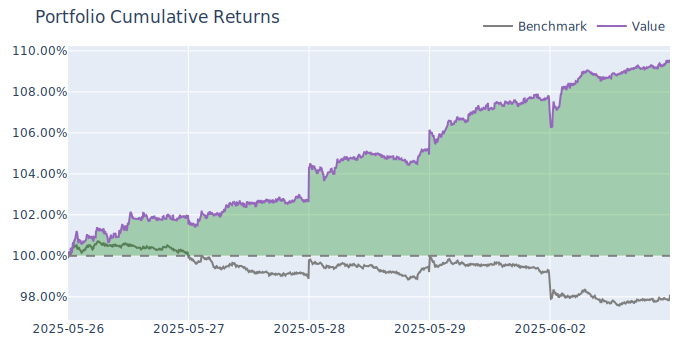

In [248]:
fig = pf_orderfnb.plot_cum_returns(title='Portfolio Cumulative Returns')
fig.update_layout(yaxis_tickformat='.2%')
show_plotly(fig_adj_xaxis(fig))     # fig_name='orderfnb_cum_ret'

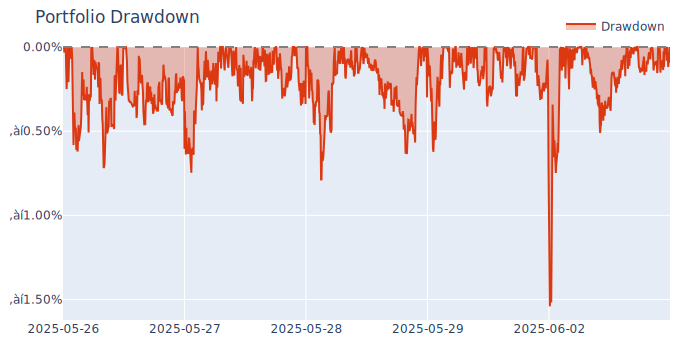

In [249]:
# ÂõûÊí§Ê∑±Â∫¶ÔºàÁõ∏Â∞çÊ≠∑Âè≤È´òÈªûË∑åÂπÖÔºâ
fig = pf_orderfnb.plot_underwater(title='Portfolio Drawdown')
fig.update_layout(yaxis_tickformat='.2%')
show_plotly(fig_adj_xaxis(fig))     # fig_name='orderfnb_drawdown'

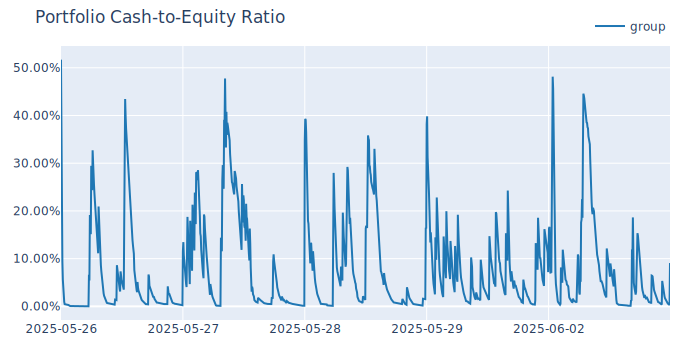

In [250]:
fig = (pf_orderfnb.cash()/pf_orderfnb.value()).vbt.plot(title='Portfolio Cash-to-Equity Ratio')
fig.update_layout(yaxis_tickformat='.2%')
show_plotly(fig_adj_xaxis(fig))     # fig_name='orderfnb_cash2equity'

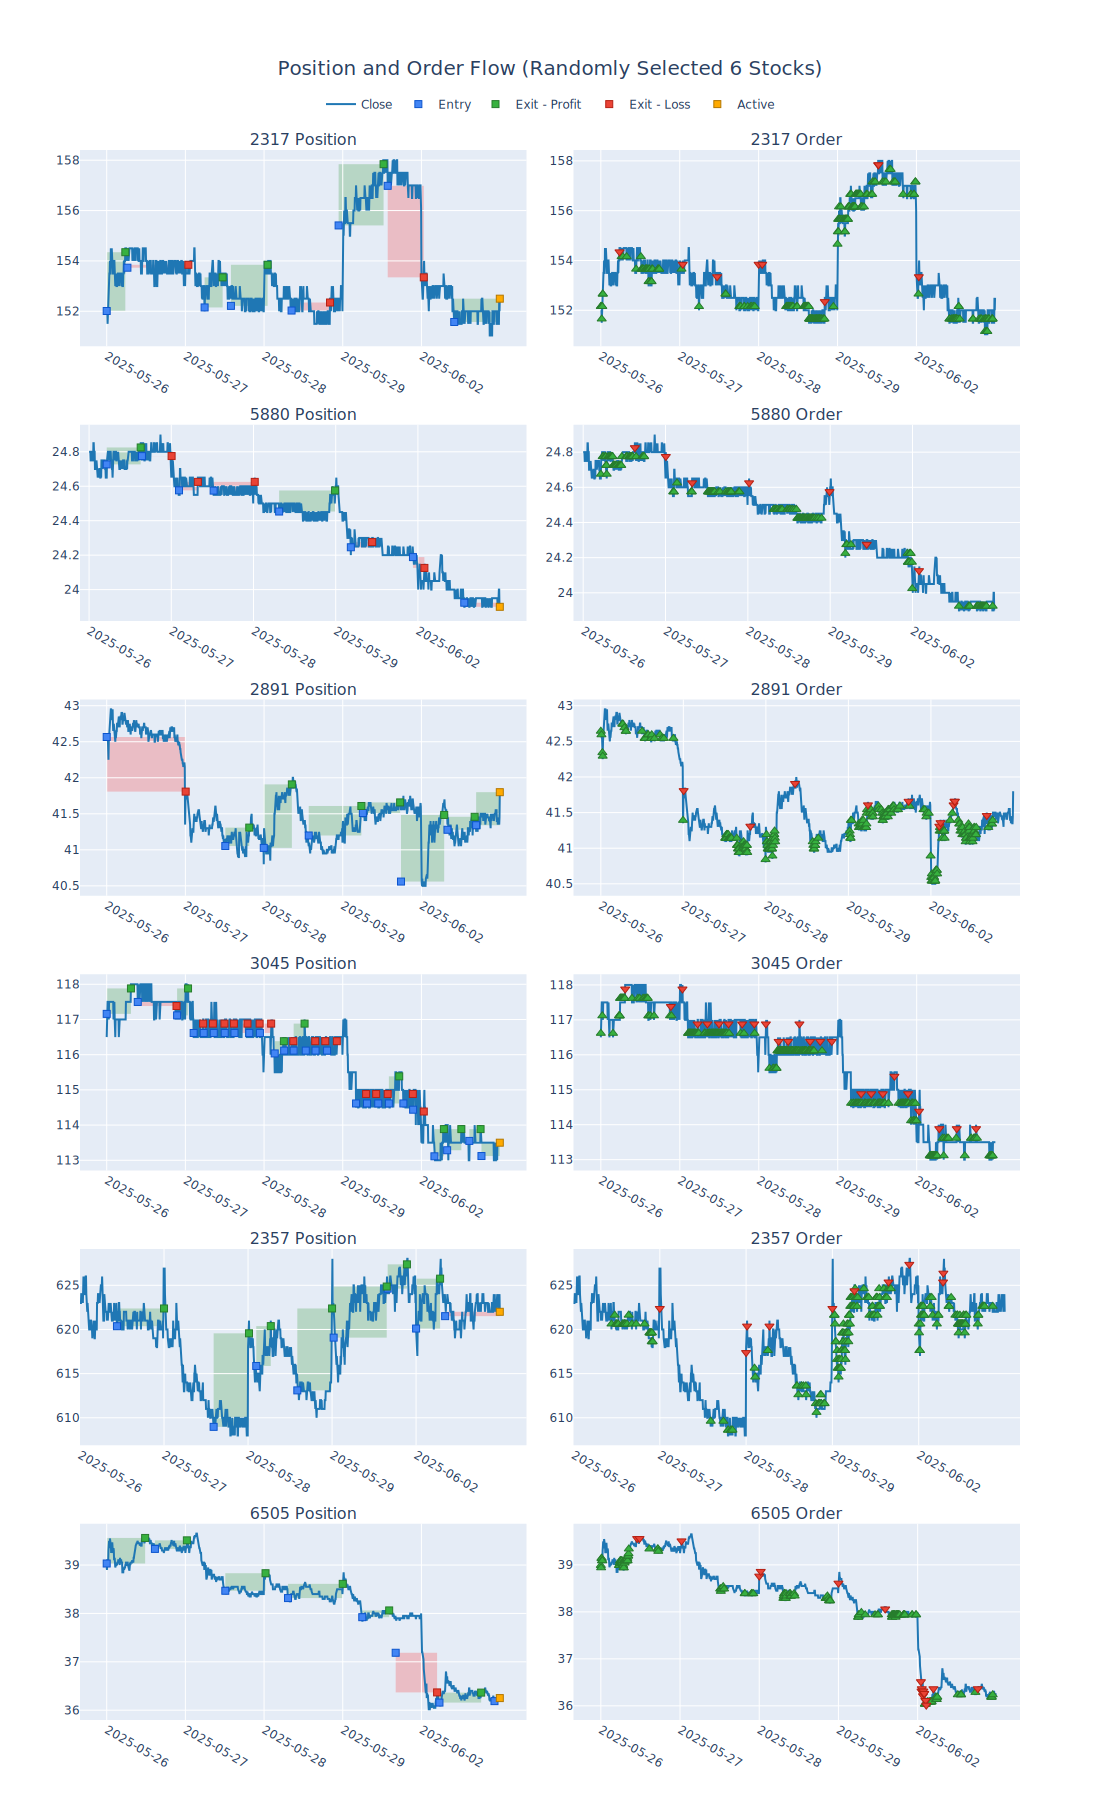

In [251]:
# ÂÄãËÇ°ÁöÑÈÉ®‰ΩçËÆäÂåñ(Position)ËàáË®ÇÂñÆÈÄ≤Âá∫ÂÄâËÆäÂåñ(Order)ÁöÑÁµêÊûúÔºàÈö®Ê©üÈÅ∏Âèñ6Ê™îÂÄãËÇ°Ôºâ

np.random.seed(320)
n = 6
ticker_chosen = np.random.choice(len(ticker_order), n, replace=False)
fig = make_subplots(rows=n, cols=2, 
                    horizontal_spacing=0.05,   # È†êË®≠ 0.2ÔºåÊîπÂ∞èÊúÉËÆìÂ≠êÂúñÊõ¥ÂØ¨
                    vertical_spacing=0.05,     # ÊîπÂ∞èÊúÉËÆìÂ≠êÂúñÊõ¥È´ò
                    subplot_titles=sum(
                        [[f'{ticker_order[i]} Position', f'{ticker_order[i]} Order'] for i in ticker_chosen]
                        , [])  # sum(,[])ÊòØÊäänested list unnest
                    )

# ÊóóÊ®ôÔºöÂè™È°ØÁ§∫‰∏ÄÊ¨°Âúñ‰æã
legend_shown = False

for row, ticker in enumerate(ticker_chosen):
    for col, data_type in enumerate(['positions', 'orders']):
        
        if data_type == 'positions':
            subfig = pf_orderfnb.positions.plot(ticker)
        else:
            subfig = pf_orderfnb.orders.plot(ticker)

        subplot_idx = row * 2 + col + 1

        # Ë®≠ÂÆö subplot Â∞çÊáâÁöÑ xref/yref ÂêçÁ®±
        xref = f'x{subplot_idx if subplot_idx > 1 else ""}'
        yref = f'y{subplot_idx if subplot_idx > 1 else ""}'

        for trace in subfig.data:
            # Âè™‰øùÁïôÁ¨¨‰∏ÄÊ¨°Âúñ‰æãÔºåÂÖ∂È§òÈóúÊéâ
            trace.showlegend = not legend_shown
            fig.add_trace(trace, row=row+1, col=col+1)

        legend_shown = True  # ‰πãÂæåÂ∞±‰∏çÂÜçÈ°ØÁ§∫Âúñ‰æã        

        # Âä†ÂÖ•Ë©≤Â≠êÂúñÁöÑÊâÄÊúâ shapeÔºàÂ¶ÇÊûúÊúâÔºâ
        if 'shapes' in subfig.layout:
            for shape in subfig.layout.shapes:
                # shape = shape.copy()  # ÈÅøÂÖç‰øÆÊîπÂéüÁâ©‰ª∂
                shape['xref'] = xref
                shape['yref'] = yref
                fig.add_shape(shape, row=row+1, col=col+1)    
        
        fig_adj_xaxis_subplot(fig, subplot_idx)

# Ë™øÊï¥ legend Âà∞ÂúñÁöÑ‰∏äÊñπ
fig.update_layout(
        title = dict(
        text=f"Position and Order Flow (Randomly Selected {n} Stocks)",
        x=0.5,  # Ê∞¥Âπ≥ÁΩÆ‰∏≠
        xanchor='center',
        font=dict(size=20)
    ),
    margin = dict(t=150),
    height=300*n,
    width=1100,
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="center",
        x=0.5
    )
)
  
show_plotly(fig)     # fig_name='orderfnb_pos_ord_flow'

# i=23
# pf2.positions.plot(i, title = ticker_order[i]).show()
# pf2.orders.plot(i, title=ticker_order[i]).show()